# Final Project Text Mining
## Shivangi Mundhra | Ang Zhou | Anna Zhao
### Clustering for Assistive Tech, Syracuse.edu, Accessibility, Campus Resources, IT Challenges

In [ ]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read in the data

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/tmFinalProjectSurveyData.csv")
# docs = data['title']
# corpus = data['title']

# if necessary, sample down the data
# docs = data.sample(n = 1000, random_state=0)['sentence'].tolist()
# print(len(docs))

In [ ]:
df.head()

ResonceID wireless.network.dissatisfaction.factor  \
0          1                                     NaN   
1          2                Ease of connection,Speed   
2          3                                     NaN   
3          4                                     NaN   
4          5                                     NaN   

  wireless.network.dissatisfaction.text wireless.network.feedback  \
0                                   NaN                      none   
1                                   NaN                       NaN   
2                                   NaN                       NaN   
3                                   NaN                       NaN   
4                                   NaN                       NaN   

  myslice.satisfied myslice.dissatisfation.factor myslice.dissatisfation.text  \
0             Agree                           NaN                         NaN   
1          Disagree                   Ease of use                         NaN   
2             Agree                           NaN                         NaN   
3             Agree                           NaN                         NaN   
4             Agree                           NaN                         NaN   

  myslice.feedback video.conferencing.use  zoom.satisfied  ...  \
0              NaN                    Yes  Strongly agree  ...   
1              NaN                    Yes  Strongly agree  ...   
2              NaN                    Yes  Strongly agree  ...   
3              NaN                    Yes           Agree  ...   
4              NaN                    Yes           Agree  ...   

  accessibility.feedback accessibility.policy.knowlege  \
0                    NaN             Somewhat disagree   
1                    NaN                      Disagree   
2                    NaN                Somewhat agree   
3                    NaN                Somewhat agree   
4                    NaN             Somewhat disagree   

  accessibility.doc.creation.impact accessibility.aware.toolkit  \
0                 Somewhat disagree                    Disagree   
1                               NaN                    Disagree   
2                    Strongly agree           Strongly disagree   
3                 Somewhat disagree                       Agree   
4                 Strongly disagree                       Agree   

  accessibility.professional.development accessibility.feedback2  \
0                         Somewhat agree                     NaN   
1                                  Agree                     NaN   
2                      Strongly disagree                     NaN   
3                                  Agree                     NaN   
4                         Strongly agree                     NaN   

  campus.resources.text                               it.challenges.text.1  \
0                   NaN                                                NaN   
1                   NaN                                                NaN   
2                   NaN                                                NaN   
3                   NaN                                                NaN   
4                   NaN  We need an approved project management softwar...   

  it.challenges.text.2 it.challenges.text.3  
0                  NaN                  NaN  
1                  NaN                  NaN  
2                  NaN                  NaN  
3                  NaN                  NaN  
4                  NaN                  NaN  

[5 rows x 54 columns]

## Assistive Tech

In [ ]:
# create a separate df for assistive tech usage
assistiveTechDf = df[['ResonceID', 'assistive.tech.use', 'assistive.tech.use.list', 'assistive.tech.use.text']]
print(assistiveTechDf.shape)

(1723, 4)


In [ ]:
# cleaning NAs
import numpy as np

assistiveTechDf['assistive.tech.use'] = np.where(assistiveTechDf['assistive.tech.use'].isna(), 'No Response', assistiveTechDf['assistive.tech.use'])

<ipython-input-5-32f6c61f6e60>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assistiveTechDf['assistive.tech.use'] = np.where(assistiveTechDf['assistive.tech.use'].isna(), 'No Response', assistiveTechDf['assistive.tech.use'])


In [ ]:
# create df for aggregated value counts
assistiveTechGroupDf = assistiveTechDf.groupby(['assistive.tech.use'])['ResonceID'].count()

In [ ]:
assistiveTechGroupDf.head()

assistive.tech.use
No             1574
No Response      97
Yes              52
Name: ResonceID, dtype: int64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

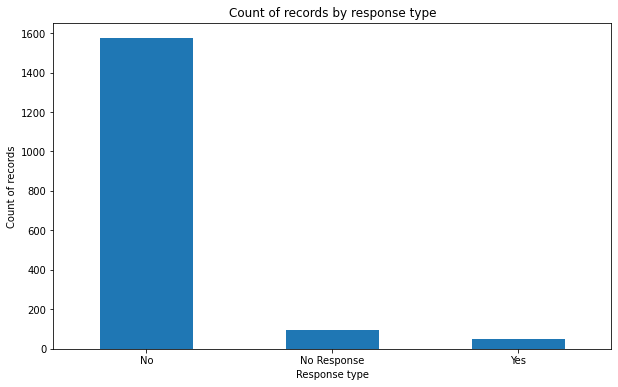

In [ ]:
# create a bar plot
import matplotlib.pyplot as plt

assistiveTechGroupDf.plot(kind = 'bar', title = 'Count of records by response type', ylabel = 'Count of records', xlabel = 'Response type', figsize = (10,6))

plt.xticks(rotation = 0)
# plt.text()

Text(0, 0.5, 'Record Count')

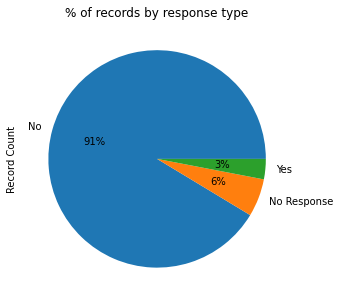

In [ ]:
# create a pie chart
assistiveTechGroupDf.plot(kind = 'pie', title = '% of records by response type', figsize = (5, 5), autopct = '%1.0f%%', legend = False)
plt.ylabel('Record Count')

In [ ]:
# filter data to show only those records that have "yes" that they use assistive tech
assistiveTechDf = assistiveTechDf[assistiveTechDf['assistive.tech.use'] == 'Yes']

In [ ]:
# create a separate column with all values from list and text columns to analyze
import numpy as np

assistiveTechDf['assistiveTopic'] = np.where(assistiveTechDf['assistive.tech.use.text'].isna(), assistiveTechDf['assistive.tech.use.list'],
                                             assistiveTechDf['assistive.tech.use.list'] + ',' + assistiveTechDf['assistive.tech.use.text'])
# df[['Year', 'quarter', ...]].agg('-'.join, axis=1)

In [ ]:
assistiveTechDf.head()

ResonceID assistive.tech.use assistive.tech.use.list  \
61          62                Yes       Voiceover for Mac   
87          88                Yes                     NaN   
149        150                Yes                   Other   
167        168                Yes                   Other   
228        229                Yes                   Other   

    assistive.tech.use.text     assistiveTopic  
61                      NaN  Voiceover for Mac  
87                      NaN                NaN  
149                     NaN              Other  
167                 Medicat      Other,Medicat  
228                     NaN              Other

In [ ]:
assistiveTechDf['assistiveTopic'].unique()

array(['Voiceover for Mac', nan, 'Other', 'Other,Medicat',
       'JAWS for Windows', 'Voiceover for Mac,Other,Read&Write',
       'Voiceover for Mac,Other,Voiceover for iOS. Keyboard navigation without a mouse.',
       'Other,Google', 'Other,increase Zoom feature ',
       'Other,Magnification',
       'Other,Was a mistake, no Idont use assistive technology',
       'Other,just the search button',
       'JAWS for Windows,NVDA,Voiceover for Mac', 'Other,None ',
       'JAWS for Windows,NVDA,Voiceover for Mac,Other,ZoomText and Fusion',
       'Other,no idea'], dtype=object)

In [ ]:
# clean up the assistiveTopic column
# replace NAs with No Response
assistiveTechDf['assistiveTopic'] = np.where(assistiveTechDf['assistiveTopic'].isna(), 'No Response', assistiveTechDf['assistiveTopic'])
# replace all values that only have "Other" to "No Response"
assistiveTechDf['assistiveTopic'] = np.where(assistiveTechDf['assistiveTopic'] == 'Other', 'No Response', assistiveTechDf['assistiveTopic'])
assistiveTechDf['assistiveTopic'] = np.where(assistiveTechDf['assistiveTopic'] == 'Other,Was a mistake, no Idont use assistive technology', 'No Response', assistiveTechDf['assistiveTopic'])
assistiveTechDf['assistiveTopic'] = np.where(assistiveTechDf['assistiveTopic'] == 'Other,None ', 'No Response', assistiveTechDf['assistiveTopic'])
assistiveTechDf['assistiveTopic'] = np.where(assistiveTechDf['assistiveTopic'] == 'Other,no idea', 'No Response', assistiveTechDf['assistiveTopic'])
# replace "Other," in the texts with '' values so Other does not show up in final tally
assistiveTechDf['assistiveTopic'] = assistiveTechDf.assistiveTopic.str.replace('Other,', '')
# manual cleanup for some records in the assistiveTopic column
assistiveTechDf['assistiveTopic'] = np.where(assistiveTechDf['assistiveTopic'] == 'Voiceover for Mac,Voiceover for iOS. Keyboard navigation without a mouse.', 'Voiceover for Mac,Voiceover for iOS,Keyboard navigation without a mouse', assistiveTechDf['assistiveTopic'])
assistiveTechDf['assistiveTopic'] = np.where(assistiveTechDf['assistiveTopic'] == 'JAWS for Windows,NVDA,Voiceover for Mac,ZoomText and Fusion', 'JAWS for Windows,NVDA,Voiceover for Mac,Magnification,Fusion', assistiveTechDf['assistiveTopic'])
assistiveTechDf['assistiveTopic'] = np.where(assistiveTechDf['assistiveTopic'] == 'increase Zoom feature ', 'Magnification', assistiveTechDf['assistiveTopic'])

In [ ]:
# get counts of each assistive tech
assistiveTechCounts = assistiveTechDf['assistiveTopic'].str.split(',').explode('assistiveTopic').value_counts()

In [ ]:
assistiveTechCounts

No Response                            33
Voiceover for Mac                      10
JAWS for Windows                        6
Magnification                           3
NVDA                                    2
Medicat                                 1
Read&Write                              1
Voiceover for iOS                       1
Keyboard navigation without a mouse     1
Google                                  1
just the search button                  1
Fusion                                  1
Name: assistiveTopic, dtype: int64

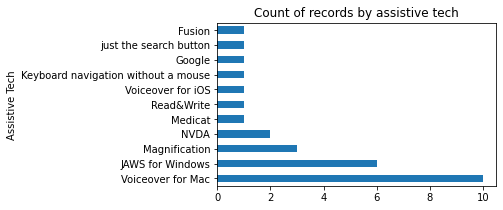

In [ ]:
# create
assistiveTechCounts.drop('No Response').plot(kind = 'barh', title = 'Count of records by assistive tech', ylabel = 'Count of records', xlabel = 'Assistive Tech',
                         figsize = (5,3))
# plt.xticks(rotation = 60)
# ax.annotate(assistiveTechCounts, 1)

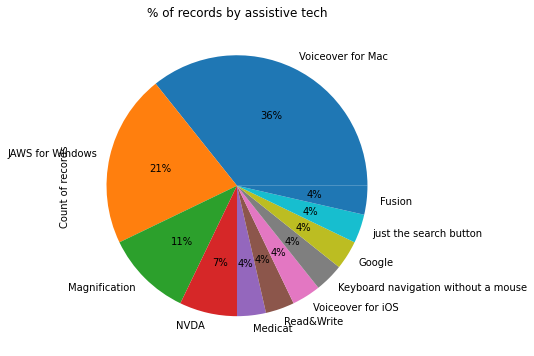

In [ ]:
# create
assistiveTechCounts.drop('No Response').plot(kind = 'pie', title = '% of records by assistive tech', ylabel = 'Count of records', xlabel = 'Assistive Tech',
                         figsize = (6,6), autopct = '%1.0f%%')

# plt.xticks(rotation = 30)
# ax.annotate(assistiveTechCounts, 1)

In [ ]:
dict(assistiveTechCounts)

{'No Response': 33,
 'Voiceover for Mac': 10,
 'JAWS for Windows': 6,
 'Magnification': 3,
 'NVDA': 2,
 'Medicat': 1,
 'Read&Write': 1,
 'Voiceover for iOS': 1,
 'Keyboard navigation without a mouse': 1,
 'Google': 1,
 'just the search button': 1,
 'Fusion': 1}

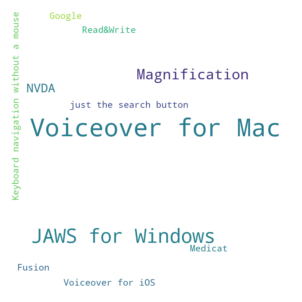

In [ ]:
# create wordcloud for assistive technology usages

from wordcloud import WordCloud
# text = " ".join(cat for cat in assistiveTechDf['assistiveTopic'].str.split(',').explode('assistiveTopic'))
# assistiveTechCounts.to_dict
# wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 10).generate_from_frequencies(assistiveTechCounts.to_dict)
wordcloud = WordCloud(width = 800, height = 800, collocations = False, background_color = 'white').generate_from_frequencies(dict(assistiveTechCounts.drop('No Response')))

plt.axis("off")
# plt.figure(figsize = (10, 10))
plt.tight_layout(pad = 0)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

## Syracuse.edu satisfaction with ease of navigation and information organization

In [ ]:
# create a separate dataframe for syracuse.edu navigation and organization
syrEduDf = df[['ResonceID', 'syracuse.edu.navigation', 'syracuse.edu.organization', 'accessibility.feedback']]
print(syrEduDf.head())

   ResonceID syracuse.edu.navigation syracuse.edu.organization  \
0          1          Somewhat agree            Somewhat agree   
1          2                   Agree                     Agree   
2          3          Strongly agree            Strongly agree   
3          4                   Agree            Somewhat agree   
4          5                   Agree                     Agree   

  accessibility.feedback  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  


In [ ]:
# replace NAs with No Response
syrEduDf = syrEduDf.fillna('No Response')

In [ ]:
syrEduNavGroup = syrEduDf.groupby(['syracuse.edu.navigation'])['ResonceID'].count()

In [ ]:
syrEduNavGroup = pd.DataFrame(syrEduNavGroup)

In [ ]:
syrEduOrgGroup = syrEduDf.groupby(['syracuse.edu.organization'])['ResonceID'].count()

In [ ]:
syrEduOrgGroup = pd.DataFrame(syrEduOrgGroup)

In [ ]:
syrEduGroup = syrEduNavGroup.merge(syrEduOrgGroup, left_index = True, right_index = True)

In [ ]:
syrEduGroup.rename(columns={'ResonceID_x': 'navigationEase', 'ResonceID_y': 'informationOrganization'}, inplace=True)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text major ticklabel objects>)

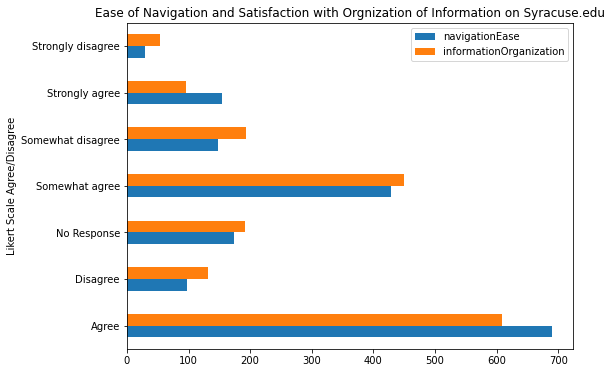

In [ ]:
syrEduGroup.plot(kind = 'barh', xlabel = 'Likert Scale Agree/Disagree', figsize = (8,6), ylabel = 'Count of records',
                 title = 'Ease of Navigation and Satisfaction with Orgnization of Information on Syracuse.edu')
plt.xticks(rotation = 0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a6b00db20>,
      dtype=object)

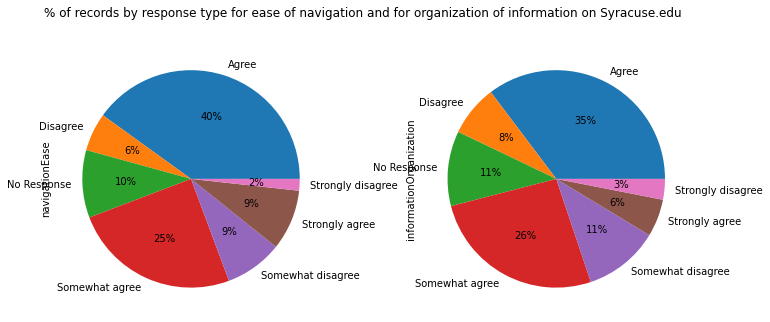

In [ ]:
# create a pie chart
syrEduGroup.plot(kind = 'pie', title = '% of records by response type for ease of navigation and for organization of information on Syracuse.edu',
                 figsize = (12, 5), autopct = '%1.0f%%', legend = False, subplots = True)
# plt.ylabel('')

In [ ]:
syrEduDf = syrEduDf[syrEduDf['accessibility.feedback'] != 'No Response']

### kMeans

In [ ]:
syrEduDf.head()

ResonceID syracuse.edu.navigation syracuse.edu.organization  \
6           7                   Agree                     Agree   
9          10          Strongly agree            Strongly agree   
23         24                   Agree                  Disagree   
25         26       Strongly disagree         Strongly disagree   
42         43          Somewhat agree                     Agree   

                               accessibility.feedback  
6   Harder to find detailed information then in th...  
9   I find syracuse.edu is usually not how I navig...  
23  There is no research button on the SU home pag...  
25  Why is it so hard to find information on SU we...  
42  Search function through the website is not alw...

In [ ]:
# import pandas as pd

# data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/HW2_headlines_10000.csv")
# docs = data['title']
corpus = syrEduDf['accessibility.feedback']

# if necessary, sample down the data
# docs = data.sample(n = 1000, random_state=0)['sentence'].tolist()
print(len(corpus))

326


In [ ]:
corpus = corpus.reset_index()
corpus = corpus.drop(columns = ['index'])
print(corpus.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   accessibility.feedback  326 non-null    object
dtypes: object(1)
memory usage: 2.7+ KB
None


In [ ]:
corpus = corpus['accessibility.feedback']

In [ ]:
# tfidf representation

from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words = 'english')
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

497


In [ ]:
from sklearn.cluster import KMeans

K = 10
tfidf_model = KMeans(n_clusters = K, random_state = 2022)
tfidf_model.fit(tfidf)
labels = tfidf_model.labels_.tolist() 

In [ ]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0) + 1
  print(cnt_perCluster)

In [ ]:
print_cluster_sizes(tfidf_model)

{4: 49, 7: 25, 3: 24, 5: 45, 0: 20, 6: 21, 1: 72, 2: 21, 8: 25, 9: 24}


In [ ]:
# print documents closest to each centroid
# sometimes we see a doc from another cluster j ends up in the list of the closest to centroid i
# this can happen when two clusters share some characteristics, 
# e.g. cluster i is about hanging out with friend, cluster j is about entertainment, a doc about going to movie with friends may be close to both centroids

# import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j] # transform all docs to cluster-distance space
    idx = np.argsort(d)[:n] # find n docs closest to centroid

    c_idx = [m for m, label in enumerate(model.labels_) if label==j]  # find the index of all docs in cluster j   
    print('\n\n======cluster #', j, ', cluster size:', len(c_idx))
    for i in idx:
      if i not in c_idx:
        print('[ this doc is in a different cluster #', model.labels_[i], '>>', corpus[i])
      else:
        print(corpus[i])
  return

In [ ]:
corpus.iloc[199]

'Simplify it.'

In [ ]:
# import numpy as np

In [ ]:
print_docs_closest_to_centroids(tfidf_model, tfidf, 5)



======cluster # 0 , cluster size: 20
[ this doc is in a different cluster # 1 >> Simplify it.
[ this doc is in a different cluster # 1 >> NONE
[ this doc is in a different cluster # 1 >> None
[ this doc is in a different cluster # 1 >> N
[ this doc is in a different cluster # 1 >> none


======cluster # 1 , cluster size: 72
NONE
Simplify it.
none
none
None


======cluster # 2 , cluster size: 21
[ this doc is in a different cluster # 1 >> none
[ this doc is in a different cluster # 1 >> None
[ this doc is in a different cluster # 1 >> none
[ this doc is in a different cluster # 1 >> Simplify it.
[ this doc is in a different cluster # 1 >> N


======cluster # 3 , cluster size: 24
[ this doc is in a different cluster # 1 >> N
[ this doc is in a different cluster # 1 >> none
[ this doc is in a different cluster # 1 >> none
[ this doc is in a different cluster # 1 >> NONE
[ this doc is in a different cluster # 1 >> None


======cluster # 4 , cluster size: 49
[ this doc is in a different c

In [ ]:
# Plot the inertia graph
import matplotlib.pyplot as plt
def plot_inertia(inertia_list):
  plt.plot(range(1,len(inertia_list) + 1), inertia_list, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()

In [ ]:
# use the Elbow method to determine the best k
# sometimes it does not work
def elbow(m, corpus):
  inertia_lst = []
  for i in range(1, m + 1):
    model = KMeans(n_clusters = i)
    model.fit(corpus)
    
    inertia = model.inertia_
    inertia_lst.append(inertia)
  plot_inertia(inertia_lst)

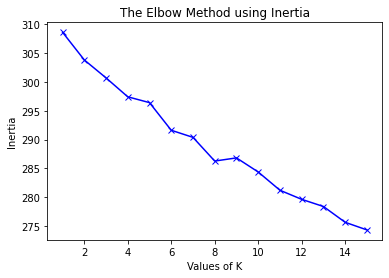

In [ ]:
elbow(15, tfidf)

In [ ]:
# compared to SBERT

In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 392 kB/s 
     |████████████████████████████████| 5.8 MB 2.9 MB/s 
     |████████████████████████████████| 1.3 MB 60.9 MB/s 
     |████████████████████████████████| 182 kB 72.7 MB/s 
     |████████████████████████████████| 7.6 MB 57.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=d12d18c9a44309d4a1f5cc90549f89a170357ae3f34fc4aba7b1e5f82b2aae1a
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
sbert_embeddings = embedder.encode(corpus)

In [ ]:
K = 6  # change number of cluster if applicable
sbert_model = KMeans(n_clusters = K, random_state = 2022)
sbert_model.fit(sbert_embeddings)
labels = sbert_model.labels_.tolist()  # Save cluster labels in a separate list

In [ ]:
print_cluster_sizes(sbert_model)

{5: 80, 4: 47, 0: 40, 3: 78, 2: 59, 1: 22}


In [ ]:
print_docs_closest_to_centroids(sbert_model, sbert_embeddings, 10)



======cluster # 0 , cluster size: 40
it's often difficult to find information on individual department webpages 
The search functionality of our website needs a lot of improvement. I find it very difficult to navigate to department pages and locate contact information. I have worked here for 6 years and still struggle with the website, so I can only imagine what our current and prospective student experiences are like. 
Over the summer, I was looking for information and struggled to locate the office I needed; this happened a few times. Usually, I'm able to quickly find information, but then again, I'm not usually exploring this site.
Difficult to quickly find things when assisting students/faculty, such as phone numbers of departments, where they are located.  By the time you find anything, you've lost the customers faith in you abilities.
There are certain campus units that I wish would provide more information about staff and their roles, with contact info--e.g., registrar and esp

### LDA

In [ ]:
# https://github.com/MaartenGr/BERTopic
# https://stackoverflow.com/questions/73830225/init-got-an-unexpected-keyword-argument-cachedir-when-importing-top2vec
# https://arxiv.org/pdf/2203.05794.pdf

#!pip install bertopic[flair, gensim, spacy, use]

!pip install bertopic
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 3.8 MB/s 
     |████████████████████████████████| 5.2 MB 46.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 636 kB 60.3 MB/s 
     |████████████████████████████████| 88 kB 8.3 MB/s 
     |████████████████████████████████| 1.1 MB 55.5 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340725 sha256=a4443b0ed2c17b42d347e508b3f42586e94164e14d631af9e90a0aa52f08451a
  Stored in directory: /root/.cache/pip/wheels/93/78/2e/03ee191669a772e9653260aa3bd53e0b1a768751a9676e8c82
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=86431089cbcdd1c407ab1181cbd7b9e93f95568748af8533db76e9e33436b186
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1f

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 34.1 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
#LDA

# removing stopwords usually improve topic models
# stoplist is often customized to include more domain-specific topic words

from sklearn.feature_extraction import text

added_stopwords = frozenset(['just', 'did'])
my_stopwords = text.ENGLISH_STOP_WORDS.union(added_stopwords)
print(len(my_stopwords))
print(my_stopwords)

320
frozenset({'anyone', 'you', 'without', 'nevertheless', 'thence', 'whoever', 'who', 'your', 'whenever', 'nowhere', 'found', 'into', 'six', 'amoungst', 'further', 'thereupon', 'that', 'cry', 'on', 'whence', 'for', 'formerly', 'mostly', 'i', 'would', 'below', 'we', 'whereupon', 'which', 'onto', 'give', 'are', 'done', 'put', 'ever', 'by', 'their', 'so', 'everything', 'often', 'anyway', 'thereafter', 'here', 'not', 'was', 'several', 'made', 'behind', 'have', 'hereupon', 'detail', 'forty', 'nine', 'him', 'each', 'fire', 'hence', 'it', 'both', 'along', 'seem', 'neither', 'all', 'side', 'until', 'any', 'hereby', 'except', 'were', 'while', 'noone', 'rather', 'system', 'namely', 'whither', 'being', 'only', 'together', 'seeming', 'sometimes', 'four', 'themselves', 'two', 'her', 'yet', 'she', 'amongst', 'after', 'ourselves', 'me', 'becomes', 'whereafter', 'either', 'he', 'above', 'more', 'eleven', 'meanwhile', 'when', 'during', 'thru', 'alone', 'nobody', 'but', 'well', 'wherever', 'again', 'fi

In [ ]:
docs = syrEduDf['accessibility.feedback']

In [ ]:
# tfidf usually help improve topic models

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words = my_stopwords)
tfidf = tfidf_vectorizer.fit_transform(docs)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

496


In [ ]:
# call the LDA algorithm to fit a topic model, and transform all documents to their topic distrinbutions

from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 6

# Run NMF
# nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components = no_topics, max_iter = 10, learning_method = 'online', learning_offset = 50., random_state = 2022)
lda_z = lda.fit_transform(tfidf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10

In [ ]:
# now examine each topic cluster to see if it makes sense
# try to label each topic cluster with a word or phrase
# it happens quite often that some topic clusters don't make sense
# when that happens, adjust the number of topics to see if better models can be created
# you can also adjust the stoplist to see if adding more stopwords leads to clearer topics

display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0:
edu syracuse research page home base issue content team organized
Topic 1:
course really exactly applicable search descriptions library related function need
Topic 2:
answers accessibility good section feedback user friendly comment myslice issues
Topic 3:
going things home recruitment need aimed year default page level
Topic 4:
information website search difficult websites pages hard use page navigate
Topic 5:
stuff deep instance requires ease law kind services buried hours


In [ ]:
# now examine the topic distribution in each document
# since each document is considered a mixture of all topics with different probabilities

# lda_z stores the prob distribution for each document
# for the 20newsgroup dataset, it is a 11314*15 matrix
# 11314 documents, 15 topics

# examine document #5 (index starts at 0)
# high prob for topics #6 and #7 (index starts at 0), with probs 0.40 and 0.41
# the document reads as related to religion

print(lda_z.shape)
print(lda_z[5])
print(docs[5])
#print(documents.shape)

(326, 6)
[0.08338448 0.08337915 0.58310166 0.08338925 0.08334895 0.0833965 ]
No feedback


In [ ]:
import bertopic

In [ ]:
# notes from BERTopic documentation
# We start by instantiating BERTopic. We set language to english since our documents are in the English language. 
# If you would like to use a multi-lingual model, please use language="multilingual" instead.
# Use language="multilingual" to select a model that support 50+ languages.
# 
# We will also calculate the topic probabilities. 
# However, this can slow down BERTopic significantly at large amounts of data (>100_000 documents). 
# It is advised to turn this off if you want to speed up the model.
#
# select sentence transformer models from https://www.sbert.net/docs/pretrained_models.html
# The all-* models where trained on all available training data (more than 1 billion training pairs) and are designed as general purpose models. 
# The all-mpnet-base-v2 model provides the best quality, while all-MiniLM-L6-v2 is 5 times faster and still offers good quality.

from bertopic import BERTopic

topic_model = BERTopic(embedding_model = "all-MiniLM-L12-v2", calculate_probabilities = True, verbose = True)
topics, probs = topic_model.fit_transform(docs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

2022-11-21 23:05:04,524 - BERTopic - Transformed documents to Embeddings
2022-11-21 23:05:12,996 - BERTopic - Reduced dimensionality
2022-11-21 23:05:13,023 - BERTopic - Clustered reduced embeddings


In [ ]:
# After generating topics and their probabilities, we can access the frequent topics that were generated
# -1 refers to all outliers and should typically be ignored. 

freq = topic_model.get_topic_info(); 
num_topics = len(freq) - 1
print(num_topics)
freq.head(num_topics)

2


Topic  Count                     Name
0     -1     17  -1_none_to_directory_it
1      0    287          0_the_to_is_and

In [ ]:
for i in range(num_topics):
  print("\n== Representative documents in cluster #", i)
  print(topic_model.get_representative_docs(i))


== Representative documents in cluster # 0
['a more comprehensive directory that parents or online callers could access would be helpful and would cut down on the amount of phone calls we take. ', 'I really like the look of our website! \n\nThe searchability piece could be improved, at times I find it difficult to find a topic, procedure, or form. It would be helpful to have a standardized system for searching basic administrative office procedures/forms (e.g. finance, facilities, HR, academics, admin, marketing/comm).  \n\nAlso, centralizing administrative and academic content (e.g. policies, procedures, and forms) on one platform (Answers, webpages, etc.) could improve efficiency of staff recreating the wheel. ', 'Why is it so hard to find information on SU websites? Allowing every college to maintain its own website leads to inconsistency in finding basic contact information']

== Representative documents in cluster # 1
['The syracuse.edu webpages tend to focus on prospective stude

In [ ]:
topic_model.find_topics("work")

([-1, 0, 1], [0.4648835939995038, 0.4516667197552669, 0.4129869237941695])

In [ ]:
topic_model.get_topic(0)  # Select the most frequent topic

[('the', 0.10264321376242821),
 ('to', 0.09867290520982795),
 ('is', 0.06985914425378523),
 ('and', 0.06661856704477062),
 ('it', 0.06627327146845233),
 ('of', 0.05069619607432546),
 ('not', 0.050584863666656515),
 ('find', 0.04910718981887708),
 ('for', 0.048824942949723685),
 ('information', 0.04622343504452206)]

In [ ]:
topic_model.visualize_topics()

ValueError: ignored

In [ ]:
topic_model.visualize_distribution(probs[200], min_probability = 0.010)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics = 50)

In [ ]:
topic_model.visualize_barchart(top_n_topics = 10)

In [ ]:
topic_model.visualize_heatmap(n_clusters = 1, width = 1000, height = 1000)

### WordCloud

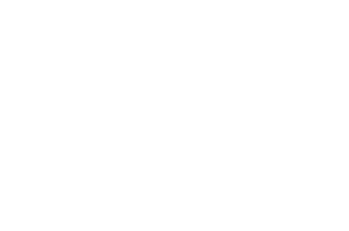

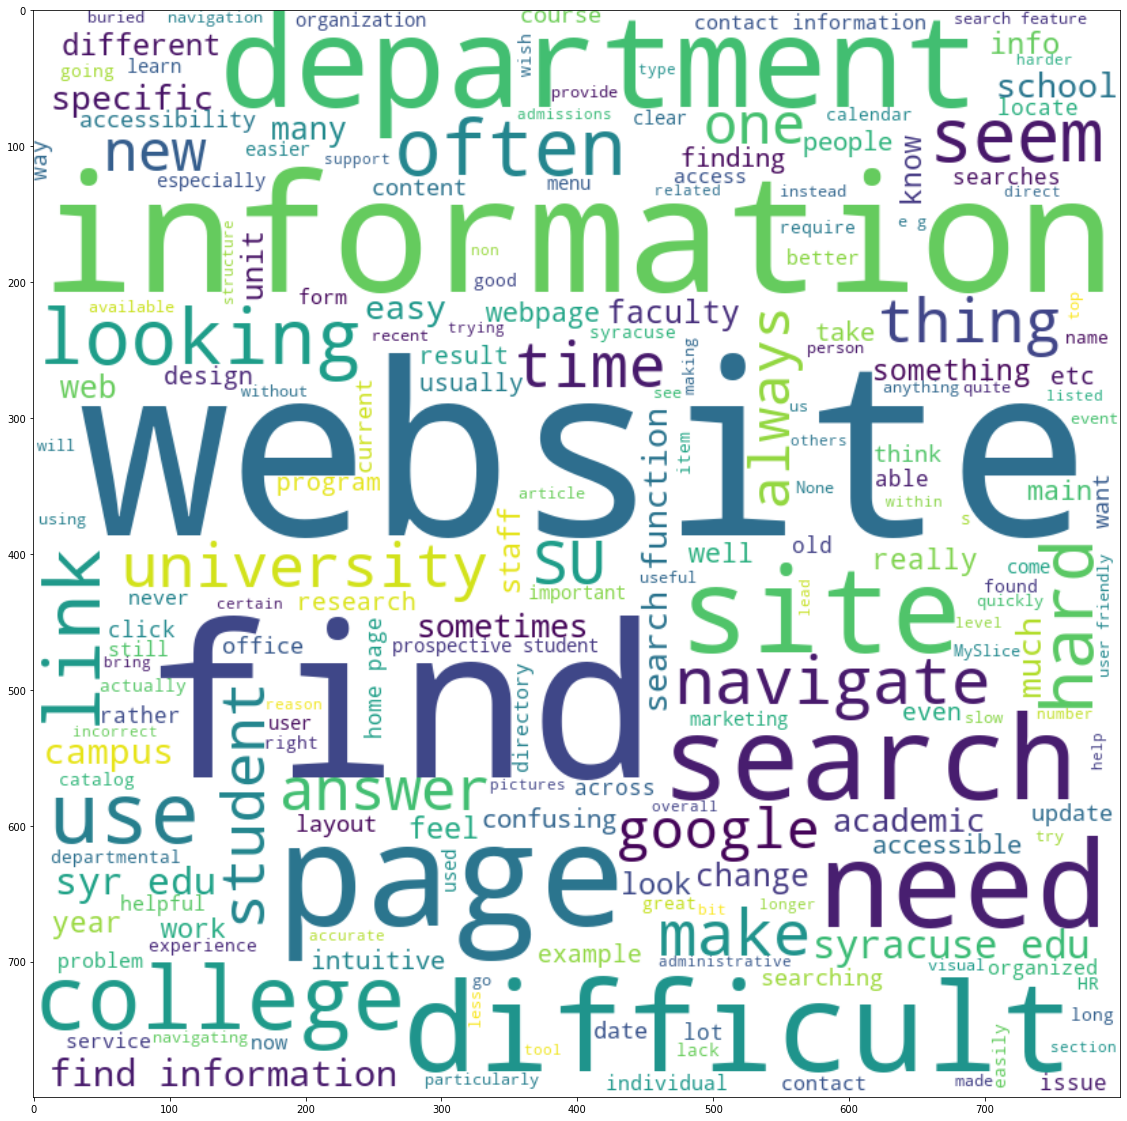

In [ ]:
# create wordcloud for assistive technology usages

# from wordcloud import WordCloud
text = " ".join(i for i in syrEduDf['accessibility.feedback'].str.split(',').explode('accessibility.feedback'))
# assistiveTechCounts.to_dict
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 5).generate(text)
# wordcloud = WordCloud(collocations = False, background_color = 'white').generate_from_frequencies(dict(assistiveTechCounts))

plt.axis("off")
plt.figure(figsize = (20, 20))
plt.tight_layout(pad = 0)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

## Campus Resources
What campus computing resources work well for you?

### WordCloud

In [ ]:
crDf = df[['campus.resources.text']]
crDf = crDf[~crDf['campus.resources.text'].isna()]
crDf = crDf.reset_index()
crDf = crDf[['campus.resources.text']]
print(crDf.head)

<bound method NDFrame.head of                                  campus.resources.text
0                 Help desk; purchase of new equipment
1                        Most resources work just fine
2    Recently, I have good experiences with the LEM...
3    I am on the computer for most of my work day. ...
4    Orange Success is complete garbage!  The only ...
..                                                 ...
518  The Answers website has been getting easier to...
519                                         RSA Verify
520  Blackboard, Zoom, and Google work pretty well ...
521  I love having a laptop that can go with me any...
522  talking to someone, I know everyone loves tech...

[523 rows x 1 columns]>


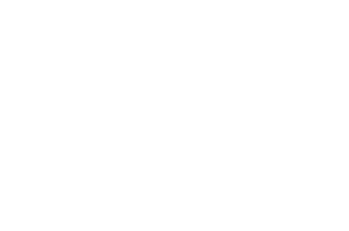

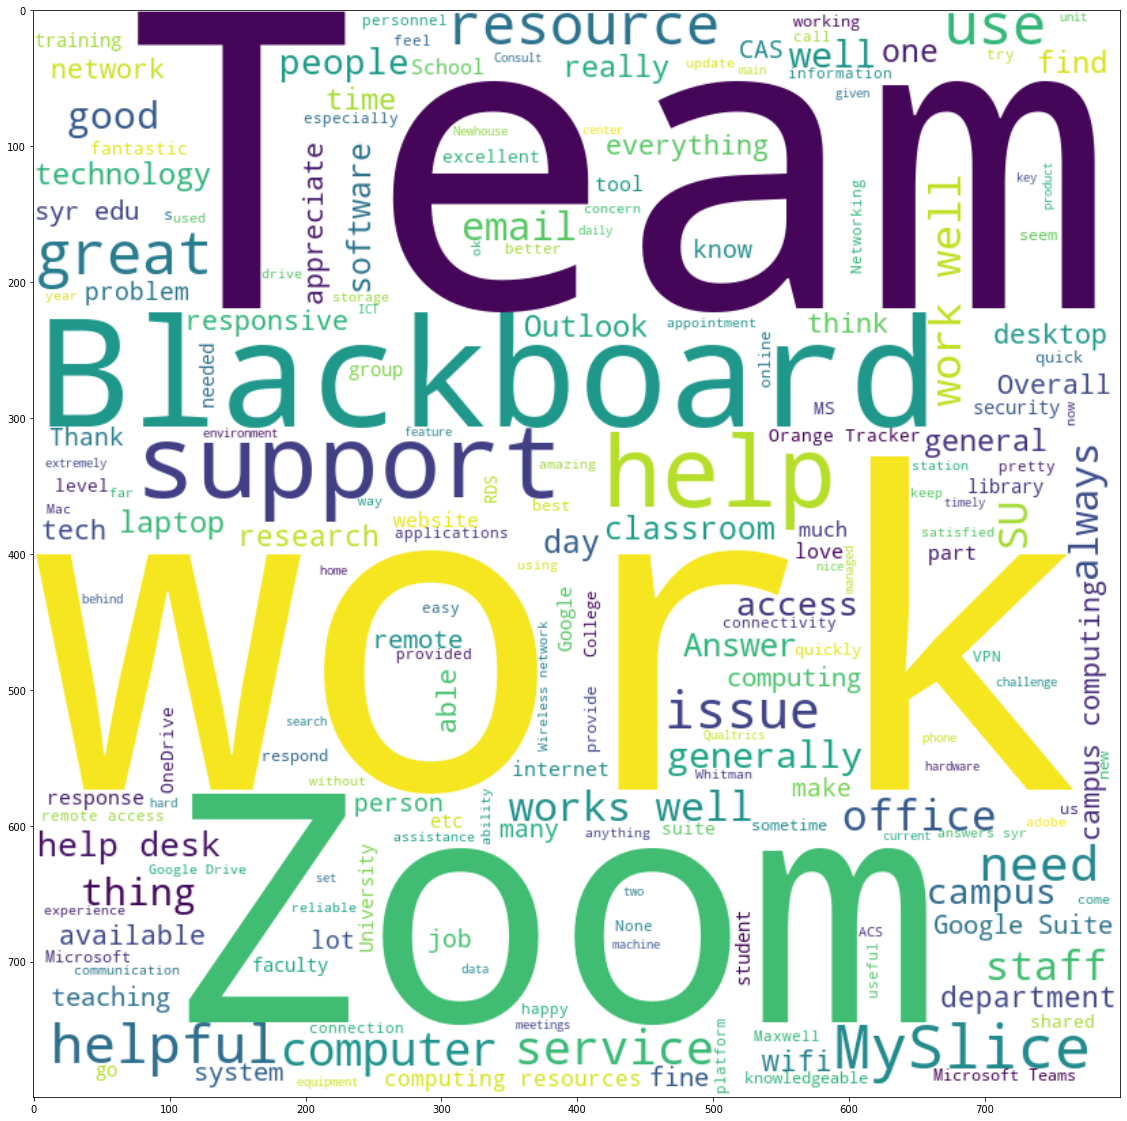

In [ ]:
# create wordcloud for assistive technology usages
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
text = " ".join(i for i in crDf['campus.resources.text'].str.split(',').explode('campus.resources.text'))
# assistiveTechCounts.to_dict
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 5).generate(text)
# wordcloud = WordCloud(collocations = False, background_color = 'white').generate_from_frequencies(dict(assistiveTechCounts))

plt.axis("off")
plt.figure(figsize = (20, 20))
plt.tight_layout(pad = 0)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

In [ ]:
crDf.head()

campus.resources.text
0               Help desk; purchase of new equipment
1                      Most resources work just fine
2  Recently, I have good experiences with the LEM...
3  I am on the computer for most of my work day. ...
4  Orange Success is complete garbage!  The only ...

### KMeans

In [ ]:
# import pandas as pd

# data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/HW2_headlines_10000.csv")
docs = crDf['campus.resources.text']
corpus = crDf['campus.resources.text']

# if necessary, sample down the data
# docs = data.sample(n = 1000, random_state=0)['sentence'].tolist()
print(len(corpus))

523


In [ ]:
# tfidf representation

from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words = 'english')
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

451


In [ ]:
from sklearn.cluster import KMeans

K = 10
tfidf_model = KMeans(n_clusters = K, random_state = 2022)
tfidf_model.fit(tfidf)
labels = tfidf_model.labels_.tolist() 

In [ ]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0) + 1
  print(cnt_perCluster)

In [ ]:
print_cluster_sizes(tfidf_model)

{8: 34, 3: 55, 0: 239, 4: 18, 5: 36, 6: 22, 1: 23, 2: 36, 7: 28, 9: 32}


In [ ]:
# print documents closest to each centroid
# sometimes we see a doc from another cluster j ends up in the list of the closest to centroid i
# this can happen when two clusters share some characteristics, 
# e.g. cluster i is about hanging out with friend, cluster j is about entertainment, a doc about going to movie with friends may be close to both centroids

import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j] # transform all docs to cluster-distance space
    idx = np.argsort(d)[:n] # find n docs closest to centroid

    c_idx = [m for m, label in enumerate(model.labels_) if label==j]  # find the index of all docs in cluster j   
    print('\n\n======cluster #', j, ', cluster size:', len(c_idx))
    for i in idx:
      if i not in c_idx:
        print('[ this doc is in a different cluster #', model.labels_[i], '>>', corpus[i])
      else:
        print(corpus[i])
  return

In [ ]:
print_docs_closest_to_centroids(tfidf_model, tfidf, 5)



======cluster # 0 , cluster size: 239
all
All
SUrge.
Most 
N/a


======cluster # 1 , cluster size: 23
Zoom, Teams
Zoom and Teams
Teams, Zoom
Teams, Zoom 
Teams, Zoom


======cluster # 2 , cluster size: 36
[ this doc is in a different cluster # 0 >> Very few
[ this doc is in a different cluster # 0 >> All
[ this doc is in a different cluster # 0 >> All of them.
[ this doc is in a different cluster # 0 >> Mostly everything. 
[ this doc is in a different cluster # 0 >> Not much


======cluster # 3 , cluster size: 55
[ this doc is in a different cluster # 0 >> Most?
[ this doc is in a different cluster # 0 >> No
[ this doc is in a different cluster # 0 >> SUrge.
[ this doc is in a different cluster # 0 >> Not much
[ this doc is in a different cluster # 0 >> Very few


======cluster # 4 , cluster size: 18
email
email
email, etc.
Email when there isn't an update.
Email


======cluster # 5 , cluster size: 36
[ this doc is in a different cluster # 0 >> Most?
[ this doc is in a different clus

In [ ]:
# Plot the inertia graph
import matplotlib.pyplot as plt
def plot_inertia(inertia_list):
  plt.plot(range(1,len(inertia_list) + 1), inertia_list, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()

In [ ]:
# use the Elbow method to determine the best k
# sometimes it does not work
def elbow(m, corpus):
  inertia_lst = []
  for i in range(1, m + 1):
    model = KMeans(n_clusters = i)
    model.fit(corpus)
    
    inertia = model.inertia_
    inertia_lst.append(inertia)
  plot_inertia(inertia_lst)

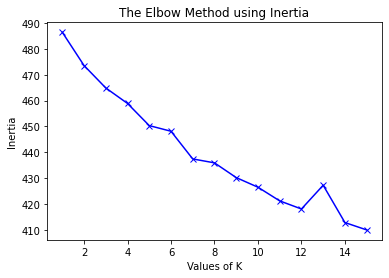

In [ ]:
elbow(15, tfidf)

### SBert

In [ ]:
# compared to SBERT

In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.0 MB/s 
     |████████████████████████████████| 5.5 MB 28.4 MB/s 
     |████████████████████████████████| 1.3 MB 52.9 MB/s 
     |████████████████████████████████| 182 kB 66.8 MB/s 
     |████████████████████████████████| 7.6 MB 43.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=9483b1a71b8ec0dc0cfcd3010cfa5c57a918c3c5a45981d0f8c7471c6919a937
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
sbert_embeddings = embedder.encode(corpus)

In [ ]:
K = 5  # change number of cluster if applicable
sbert_model = KMeans(n_clusters = K, random_state = 2022)
sbert_model.fit(sbert_embeddings)
labels = sbert_model.labels_.tolist()  # Save cluster labels in a separate list

In [ ]:
print_cluster_sizes(sbert_model)

{1: 113, 4: 127, 0: 74, 2: 112, 3: 97}


In [ ]:
print_docs_closest_to_centroids(sbert_model, sbert_embeddings, 10)



======cluster # 0 , cluster size: 74
Blackboard, MySlice, and Zoom.
Office, Teams, Zoom, Blackboard
Zoom, Blackboard, MySlice
Zoom, Blackboard, MS Teams
Zoom,Outlook, Blackboard and Teams works well for me. 
Blackboard, Zoom, and Google work pretty well for me.
I would say Zoom, Blackboard, and MySlice work somewhat well.
Blackboard, google suite, Kaltura, Zoom
love blackboard and the help i've gotten with it over time. Zoom works well for me as well. the workshops we had when we had to go online were helpful!
Blackboard, along with Zoom, has become a very important part of my teaching.


======cluster # 1 , cluster size: 113
The central ITS staff are extremely helpful. They are always quick to respond and make sure that they find a solution for me. They are a pleasure to work with. 
Falk IT personnel are VERY helpful. I can get help with putting material on our web site fairly readily (except the lack of personnel to make documents accessible). The SU IT help desk responds quickly t

### LDA

In [ ]:
# https://github.com/MaartenGr/BERTopic
# https://stackoverflow.com/questions/73830225/init-got-an-unexpected-keyword-argument-cachedir-when-importing-top2vec
# https://arxiv.org/pdf/2203.05794.pdf

#!pip install bertopic[flair, gensim, spacy, use]

!pip install bertopic
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 7.3 MB/s 
     |████████████████████████████████| 636 kB 63.6 MB/s 
     |████████████████████████████████| 5.2 MB 66.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 7.9 MB/s 
     |████████████████████████████████| 1.1 MB 60.9 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340740 sha256=f482ccfde6c7edc7885223d9283329431b3fb5412a6a00f8786d251b30e59331
  Stored in directory: /root/.cache/pip/wheels/93/78/2e/03ee191669a772e9653260aa3bd53e0b1a768751a9676e8c82
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=240c0067454c37a6cd661873a22fe214a68e28dc161c489d3b160cb8d393ce6d
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1f

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 12.6 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
#LDA

# removing stopwords usually improve topic models
# stoplist is often customized to include more domain-specific topic words

from sklearn.feature_extraction import text

added_stopwords = frozenset(['just', 'did'])
my_stopwords = text.ENGLISH_STOP_WORDS.union(added_stopwords)
print(len(my_stopwords))
print(my_stopwords)

320
frozenset({'otherwise', 'became', 'although', 'neither', 'at', 'along', 'seems', 'might', 'those', 'anything', 'that', 'up', 'five', 'ourselves', 'her', 'into', 'whether', 'above', 'amount', 'system', 'ten', 'there', 'ie', 'mostly', 'whereby', 'by', 'namely', 'what', 'we', 'therein', 'sincere', 'someone', 'all', 'others', 'though', 'over', 'beside', 'can', 'six', 'keep', 'everything', 'she', 'else', 'his', 'because', 'becomes', 'whence', 'either', 'hundred', 'hereupon', 'whatever', 'something', 'whose', 'could', 'among', 'hence', 'inc', 'fifty', 'latterly', 'thereupon', 'show', 'give', 'towards', 'elsewhere', 'take', 'and', 'under', 'behind', 'been', 'thereby', 'cant', 'well', 'on', 'three', 'few', 'empty', 'us', 'almost', 'anywhere', 'yourself', 'during', 'own', 'do', 'did', 'their', 'thin', 'last', 'please', 'once', 'sometimes', 'anyhow', 'of', 'has', 'ours', 'which', 'will', 'himself', 'an', 'until', 'yourselves', 'your', 'so', 'only', 'am', 'these', 'per', 'cry', 'alone', 'both

In [ ]:
# tfidf usually help improve topic models

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words = my_stopwords)
tfidf = tfidf_vectorizer.fit_transform(docs)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

449


In [ ]:
# call the LDA algorithm to fit a topic model, and transform all documents to their topic distrinbutions

from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 5

# Run NMF
# nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components = no_topics, max_iter = 10, learning_method = 'online', learning_offset = 50., random_state = 2022)
lda_z = lda.fit_transform(tfidf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10

In [ ]:
# now examine each topic cluster to see if it makes sense
# try to label each topic cluster with a word or phrase
# it happens quite often that some topic clusters don't make sense
# when that happens, adjust the number of topics to see if better models can be created
# you can also adjust the stoplist to see if adding more stopwords leads to clearer topics

display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0:
work computing resources great su computers virtual access managed need
Topic 1:
blackboard google pretty email zoom suite work works outlook use
Topic 2:
fine person bb people work team cas consult use problems
Topic 3:
help desk support syr edu good helpful maxwell staff answers
Topic 4:
teams zoom myslice blackboard orange tracker qualtrics answers website navigate


In [ ]:
# now examine the topic distribution in each document
# since each document is considered a mixture of all topics with different probabilities

# lda_z stores the prob distribution for each document
# for the 20newsgroup dataset, it is a 11314*15 matrix
# 11314 documents, 15 topics

# examine document #5 (index starts at 0)
# high prob for topics #6 and #7 (index starts at 0), with probs 0.40 and 0.41
# the document reads as related to religion

print(lda_z.shape)
print(lda_z[5])
print(docs[5])
#print(documents.shape)

(523, 5)
[0.3606595  0.05991964 0.05315785 0.05465201 0.47161101]
Computers, wifi network, zoom conferencing, email, myslice, blackboard.


In [ ]:
import bertopic

In [ ]:
# notes from BERTopic documentation
# We start by instantiating BERTopic. We set language to english since our documents are in the English language. 
# If you would like to use a multi-lingual model, please use language="multilingual" instead.
# Use language="multilingual" to select a model that support 50+ languages.
# 
# We will also calculate the topic probabilities. 
# However, this can slow down BERTopic significantly at large amounts of data (>100_000 documents). 
# It is advised to turn this off if you want to speed up the model.
#
# select sentence transformer models from https://www.sbert.net/docs/pretrained_models.html
# The all-* models where trained on all available training data (more than 1 billion training pairs) and are designed as general purpose models. 
# The all-mpnet-base-v2 model provides the best quality, while all-MiniLM-L6-v2 is 5 times faster and still offers good quality.

from bertopic import BERTopic

topic_model = BERTopic(embedding_model = "all-MiniLM-L12-v2", calculate_probabilities = True, verbose = True)
topics, probs = topic_model.fit_transform(docs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/17 [00:00<?, ?it/s]

2022-11-22 00:58:50,499 - BERTopic - Transformed documents to Embeddings
2022-11-22 00:59:00,197 - BERTopic - Reduced dimensionality
2022-11-22 00:59:00,238 - BERTopic - Clustered reduced embeddings


In [ ]:
# After generating topics and their probabilities, we can access the frequent topics that were generated
# -1 refers to all outliers and should typically be ignored. 

freq = topic_model.get_topic_info(); 
num_topics = len(freq) - 1
print(num_topics)
freq.head(num_topics)

1


Topic  Count             Name
0      0    495  0_the_and_to_is

In [ ]:
for i in range(num_topics):
  print("\n== Representative documents in cluster #", i)
  print(topic_model.get_representative_docs(i))


== Representative documents in cluster # 0
['Our internal IT team Lead by Andrew Molloy is absolutely wonderful. They are available when needed and are a great asset to our team.', 'Overall, I think they all work well. ', 'AirOrangeX works very well, as does the technology in most classrooms.']


In [ ]:
topic_model.find_topics("work")

([0, 1], [0.5118693586527118, 0.38663530849383115])

In [ ]:
topic_model.get_topic(0)  # Select the most frequent topic

[('the', 0.10543146556122834),
 ('and', 0.10189442379354428),
 ('to', 0.08067704865051058),
 ('is', 0.07253353260502889),
 ('it', 0.06135832730930441),
 ('for', 0.053340585991122985),
 ('in', 0.051167105516978346),
 ('are', 0.05063411483450982),
 ('work', 0.04651848360234335),
 ('of', 0.044872451914632405)]

In [ ]:
topic_model.visualize_topics()

ValueError: ignored

In [ ]:
topic_model.visualize_distribution(probs[200], min_probability = 0.010)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics = 50)

In [ ]:
topic_model.visualize_barchart(top_n_topics = 10)

In [ ]:
topic_model.visualize_heatmap(n_clusters = 1, width = 1000, height = 1000)

## IT Challenges
What, if any, information technology support and/or service challenges are you currently facing that have the greatest impact on your work / time? Please include any recommendations you may have for resolving those challenges.

In [ ]:
itDf = df[['it.challenges.text.1']]
itDf = itDf[~itDf['it.challenges.text.1'].isna()].reset_index()
itDf = itDf[['it.challenges.text.1']]
itDf.rename(columns = {'it.challenges.text.1':'itChallenges'}, inplace = True)
print(itDf.shape)
# itDf = itDf.append(df[['it.challenges.text.2']])

(619, 1)


In [ ]:
itDf2 = df[['it.challenges.text.2']]
itDf2 = itDf2[~itDf2['it.challenges.text.2'].isna()].reset_index()
itDf2 = itDf2[['it.challenges.text.2']]
itDf2.rename(columns = {'it.challenges.text.2':'itChallenges'}, inplace = True)
print(itDf2.shape)
itDf3 = df[['it.challenges.text.3']]
itDf3 = itDf3[~itDf3['it.challenges.text.3'].isna()].reset_index()
itDf3 = itDf3[['it.challenges.text.3']]
itDf3.rename(columns = {'it.challenges.text.3':'itChallenges'}, inplace = True)
print(itDf3.shape)

(314, 1)
(152, 1)


In [ ]:
itDf = itDf.append(itDf2, ignore_index = True)

In [ ]:
itDf.head()

itChallenges
0  We need an approved project management softwar...
1  Outdated technology like laptops and cell phon...
2                                   aging of laptops
3  It has always been a challenge to install larg...
4  This complaint is on behalf of the students I ...

In [ ]:
itDf = itDf.append(itDf3, ignore_index = True)

In [ ]:
itDf.shape

(1085, 1)

### WordCloud

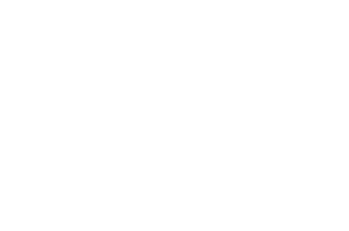

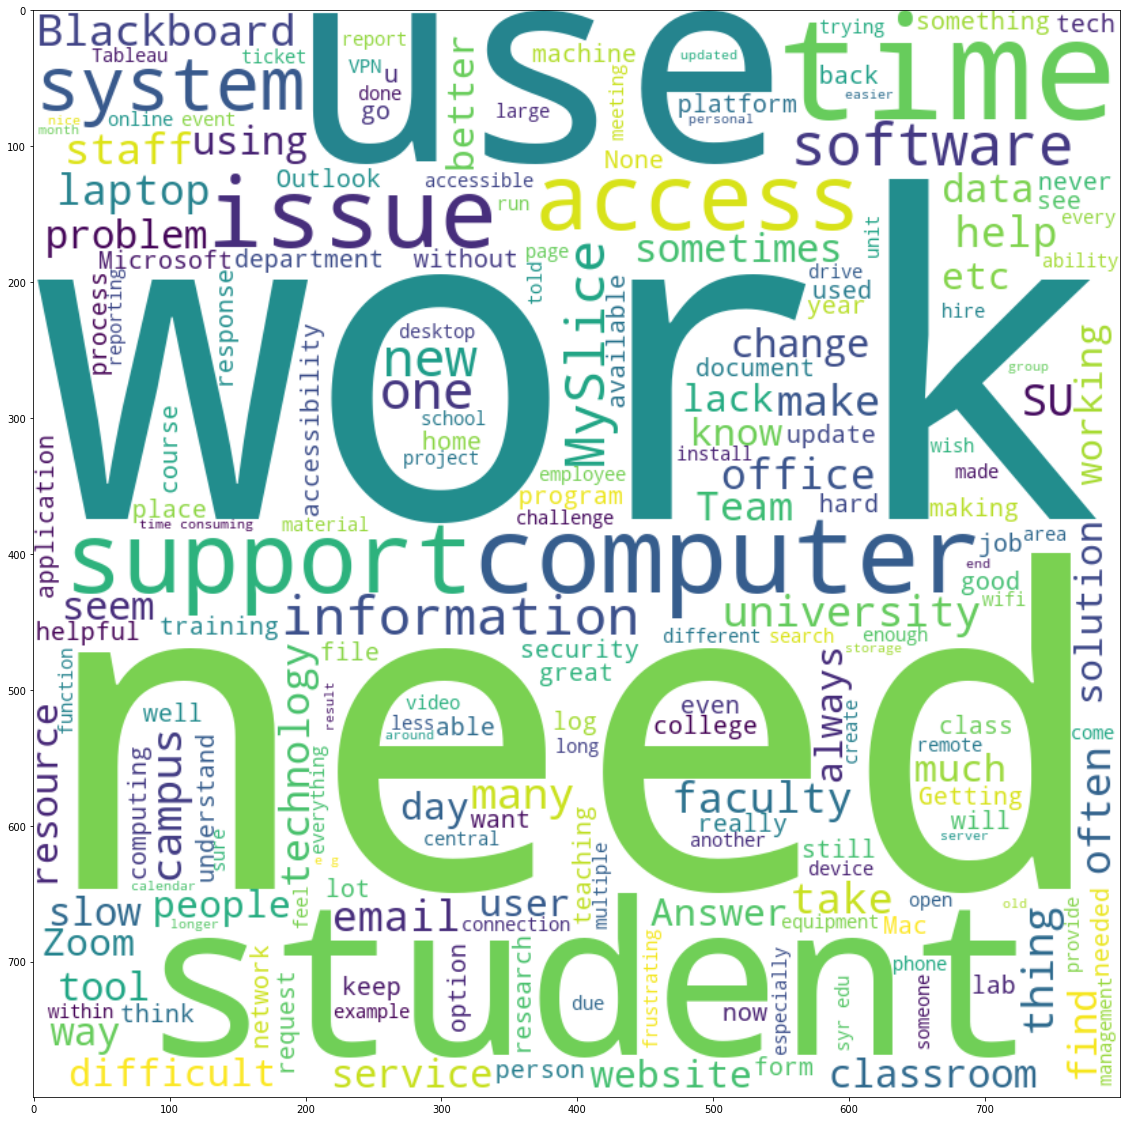

In [ ]:
# create wordcloud for assistive technology usages
# import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
text = " ".join(i for i in itDf['itChallenges'].str.split(',').explode('itChallenges'))
# assistiveTechCounts.to_dict
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 5, stopwords = stopwords).generate(text)
# wordcloud = WordCloud(collocations = False, background_color = 'white').generate_from_frequencies(dict(assistiveTechCounts))

plt.axis("off")
plt.figure(figsize = (20, 20))
plt.tight_layout(pad = 0)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

### KMeans

In [ ]:
docs = itDf['itChallenges']
corpus = itDf['itChallenges']

# if necessary, sample down the data
# docs = data.sample(n = 1000, random_state=0)['sentence'].tolist()
print(len(docs))

# tfidf representation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

#tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words = set(ENGLISH_STOP_WORDS))
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

1085
1671


In [ ]:
from sklearn.cluster import KMeans

K = 10
tfidf_model = KMeans(n_clusters = K, random_state = 2022)
tfidf_model.fit(tfidf)
labels = tfidf_model.labels_.tolist() 

In [ ]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0) + 1
  print(cnt_perCluster)

In [ ]:
print_cluster_sizes(tfidf_model)

{0: 61, 5: 363, 6: 166, 2: 132, 7: 29, 4: 94, 3: 74, 8: 40, 9: 53, 1: 73}


In [ ]:
# print documents closest to each centroid
# sometimes we see a doc from another cluster j ends up in the list of the closest to centroid i
# this can happen when two clusters share some characteristics, 
# e.g. cluster i is about hanging out with friend, cluster j is about entertainment, a doc about going to movie with friends may be close to both centroids

import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j] # transform all docs to cluster-distance space
    idx = np.argsort(d)[:n] # find n docs closest to centroid

    c_idx = [m for m, label in enumerate(model.labels_) if label==j]  # find the index of all docs in cluster j   
    print('\n\n======cluster #', j, ', cluster size:', len(c_idx))
    for i in idx:
      if i not in c_idx:
        print('[ this doc is in a different cluster #', model.labels_[i], '>>', corpus[i])
      else:
        print(corpus[i])
  return

In [ ]:
print_docs_closest_to_centroids(tfidf_model, tfidf, 5)



======cluster # 0 , cluster size: 61
[ this doc is in a different cluster # 5 >> none
[ this doc is in a different cluster # 5 >> N/a
[ this doc is in a different cluster # 5 >> None
[ this doc is in a different cluster # 5 >> NHCloud Blows.
[ this doc is in a different cluster # 5 >> None


======cluster # 1 , cluster size: 73
[ this doc is in a different cluster # 5 >> N
[ this doc is in a different cluster # 5 >> None
[ this doc is in a different cluster # 5 >> none
[ this doc is in a different cluster # 5 >> None
[ this doc is in a different cluster # 5 >> many roadblocks


======cluster # 2 , cluster size: 132
[ this doc is in a different cluster # 5 >> None
[ this doc is in a different cluster # 5 >> None
[ this doc is in a different cluster # 5 >> N
[ this doc is in a different cluster # 5 >> none
[ this doc is in a different cluster # 5 >> Already stated above


======cluster # 3 , cluster size: 74
[ this doc is in a different cluster # 5 >> none
[ this doc is in a different 

In [ ]:
# Plot the inertia graph
import matplotlib.pyplot as plt
def plot_inertia(inertia_list):
  plt.plot(range(1,len(inertia_list) + 1), inertia_list, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()

In [ ]:
# use the Elbow method to determine the best k
# sometimes it does not work
def elbow(m, corpus):
  inertia_lst = []
  for i in range(1, m + 1):
    model = KMeans(n_clusters = i)
    model.fit(corpus)
    
    inertia = model.inertia_
    inertia_lst.append(inertia)
  plot_inertia(inertia_lst)

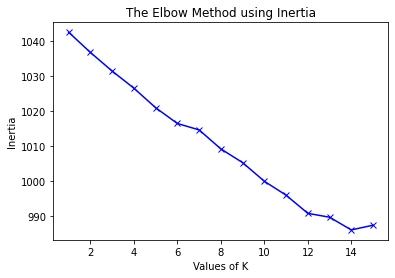

In [ ]:
elbow(15, tfidf)

### SBERT

In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
sbert_embeddings = embedder.encode(corpus)

In [ ]:
K = 6  # change number of cluster if applicable
sbert_model = KMeans(n_clusters = K, random_state = 2022)
sbert_model.fit(sbert_embeddings)
labels = sbert_model.labels_.tolist()  # Save cluster labels in a separate list

In [ ]:
print_cluster_sizes(sbert_model)

{2: 301, 4: 258, 0: 228, 1: 203, 5: 59, 3: 36}


In [ ]:
print_docs_closest_to_centroids(sbert_model, sbert_embeddings, 10)



======cluster # 0 , cluster size: 228
Central IT does not seem to know how to help our students with their technology issues (ex. Zoom accounts)
while managing technology on such a large campus and each school/college having its own ITS services, there is still delays in getting responses to problems and concerns
Getting support for our departmental technology outside the classroom
Installing software on classroom computers. More staff focusing on this aspect. 
Please allow faculty more leeway in setting up and updating their computer without centralizing and restricting everything. 
Classroom tech, Teams, logging on, my slice, ordering equipment, installing software 
Our department often needs software and systems outside of what the majority of campus uses. Because of this we often feel under-supported or placed at the back of the queue. 
There aren't enough campus IT support people, which makes resolution of issues take longer than is convenient
Technology is too basic. Provide op

### LDA

In [ ]:
# https://github.com/MaartenGr/BERTopic
# https://stackoverflow.com/questions/73830225/init-got-an-unexpected-keyword-argument-cachedir-when-importing-top2vec
# https://arxiv.org/pdf/2203.05794.pdf

#!pip install bertopic[flair, gensim, spacy, use]

!pip install bertopic
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#LDA

# removing stopwords usually improve topic models
# stoplist is often customized to include more domain-specific topic words

from sklearn.feature_extraction import text

added_stopwords = frozenset(['just', 'did'])
my_stopwords = text.ENGLISH_STOP_WORDS.union(added_stopwords)
print(len(my_stopwords))
print(my_stopwords)

320
frozenset({'otherwise', 'became', 'although', 'neither', 'at', 'along', 'seems', 'might', 'those', 'anything', 'that', 'up', 'five', 'ourselves', 'her', 'into', 'whether', 'above', 'amount', 'system', 'ten', 'there', 'ie', 'mostly', 'whereby', 'by', 'namely', 'what', 'we', 'therein', 'sincere', 'someone', 'all', 'others', 'though', 'over', 'beside', 'can', 'six', 'keep', 'everything', 'she', 'else', 'his', 'because', 'becomes', 'whence', 'either', 'hundred', 'hereupon', 'whatever', 'something', 'whose', 'could', 'among', 'hence', 'inc', 'fifty', 'latterly', 'thereupon', 'show', 'give', 'towards', 'elsewhere', 'take', 'and', 'under', 'behind', 'been', 'thereby', 'cant', 'well', 'on', 'three', 'few', 'empty', 'us', 'almost', 'anywhere', 'yourself', 'during', 'own', 'do', 'did', 'their', 'thin', 'last', 'please', 'once', 'sometimes', 'anyhow', 'of', 'has', 'ours', 'which', 'will', 'himself', 'an', 'until', 'yourselves', 'your', 'so', 'only', 'am', 'these', 'per', 'cry', 'alone', 'both

In [ ]:
# tfidf usually help improve topic models

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words = my_stopwords)
tfidf = tfidf_vectorizer.fit_transform(docs)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

1669


In [ ]:
# call the LDA algorithm to fit a topic model, and transform all documents to their topic distrinbutions

from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 6

# Run NMF
# nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components = no_topics, max_iter = 10, learning_method = 'online', learning_offset = 50., random_state = 2022)
lda_z = lda.fit_transform(tfidf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10

In [ ]:
# now examine each topic cluster to see if it makes sense
# try to label each topic cluster with a word or phrase
# it happens quite often that some topic clusters don't make sense
# when that happens, adjust the number of topics to see if better models can be created
# you can also adjust the stoplist to see if adding more stopwords leads to clearer topics

display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0:
blackboard wireless usability think security intuitive slice book times cloud
Topic 1:
wifi internet outlook faster email search classroom right reliable idea
Topic 2:
zoom office meetings classroom technology teams knowing airorangex queue ot
Topic 3:
poor freeze computer lags saving networked factor restart freezes hasn
Topic 4:
time use work software computer access support students need university
Topic 5:
answers information tech search myslice staff help support navigate know


In [ ]:
# now examine the topic distribution in each document
# since each document is considered a mixture of all topics with different probabilities

# lda_z stores the prob distribution for each document
# for the 20newsgroup dataset, it is a 11314*15 matrix
# 11314 documents, 15 topics

# examine document #5 (index starts at 0)
# high prob for topics #6 and #7 (index starts at 0), with probs 0.40 and 0.41
# the document reads as related to religion

print(lda_z.shape)
print(lda_z[5])
print(docs[5])
#print(documents.shape)

(1085, 6)
[0.04548001 0.0453244  0.04486383 0.04487054 0.04732767 0.77213354]
I am not sure if this is under the control of ITS, but SU relies heavily on "Answers" and when I have questions I am always directed to Answers.  Answers is horrible...it is so difficult to find any "answers" on Answers. I hate it.


In [ ]:
import bertopic

In [ ]:
# notes from BERTopic documentation
# We start by instantiating BERTopic. We set language to english since our documents are in the English language. 
# If you would like to use a multi-lingual model, please use language="multilingual" instead.
# Use language="multilingual" to select a model that support 50+ languages.
# 
# We will also calculate the topic probabilities. 
# However, this can slow down BERTopic significantly at large amounts of data (>100_000 documents). 
# It is advised to turn this off if you want to speed up the model.
#
# select sentence transformer models from https://www.sbert.net/docs/pretrained_models.html
# The all-* models where trained on all available training data (more than 1 billion training pairs) and are designed as general purpose models. 
# The all-mpnet-base-v2 model provides the best quality, while all-MiniLM-L6-v2 is 5 times faster and still offers good quality.

from bertopic import BERTopic

topic_model = BERTopic(embedding_model = "all-MiniLM-L12-v2", calculate_probabilities = True, verbose = True)
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/34 [00:00<?, ?it/s]

2022-11-22 02:42:23,654 - BERTopic - Transformed documents to Embeddings
2022-11-22 02:42:29,024 - BERTopic - Reduced dimensionality
2022-11-22 02:42:29,140 - BERTopic - Clustered reduced embeddings


In [ ]:
# After generating topics and their probabilities, we can access the frequent topics that were generated
# -1 refers to all outliers and should typically be ignored. 

freq = topic_model.get_topic_info(); 
num_topics = len(freq) - 1
print(num_topics)
freq.head(num_topics)

24


Topic  Count                                         Name
0      -1    306                             -1_to_the_and_of
1       0    120                              0_to_it_and_the
2       1     61                1_answers_find_website_search
3       2     55                 2_blackboard_students_and_is
4       3     53                         3_myslice_not_to_the
5       4     49      4_wifi_wireless_connectivity_airorangex
6       5     44                5_classroom_in_classrooms_the
7       6     39      6_accessibility_accessible_documents_to
8       7     38                        7_remote_home_vpn_rds
9       8     36                 8_computer_admin_my_software
10      9     35                    9_laptop_laptops_have_the
11     10     34               10_outlook_email_search_emails
12     11     29               11_zoom_teams_meetings_meeting
13     12     26             12_none_think_roadblocks_covered
14     13     26                13_storage_drive_files_google
15     14     18               14_passwords_factor_phone_cell
16     15     18                15_printing_print_printers_on
17     16     14                   16_computer_slow_freeze_my
18     17     14                  17_event_events_campus_cart
19     18     14                 18_we_the_research_computing
20     19     13                   19_mac_apple_users_support
21     20     11  20_changes_process_information_communicated
22     21     11             21_reporting_myreports_system_hr
23     22     11                  22_phone_system_cell_office

In [ ]:
for i in range(num_topics):
  print("\n== Representative documents in cluster #", i)
  print(topic_model.get_representative_docs(i))


== Representative documents in cluster # 0
['Stressed-out and understaffed support that ends up defaulting to blanket "no".  Hire more people. I know folks are trying. ', 'My sense is that the COL ITS is generally understaffed, so it is difficult at times to get help.', 'Tableau reporting software is clunky and requires excessive manipulation of the data to create reports compared to Hyperion. Converting our existing reports has been a very large undertaking and new reports will require straight sql code.  Getting data to those we support is slower with Tableau which could be an issue when time sensitive data is needed.    ']

== Representative documents in cluster # 1
['Campus primary web sites are dumbed down and make it difficult to find any real details about anything.', 'Navigating The College (A&S) website', 'Answers never finds the answers to my questions']

== Representative documents in cluster # 2
['Grading/Turnitin in Blackboard', 'Blackboard is a dinosaur.', 'Blackboard is

In [ ]:
topic_model.find_topics("work")

([23, 18, 0, 1, 20],
 [0.5398254071030948,
  0.5123922435607979,
  0.49083264885582767,
  0.4832417289577892,
  0.4784918409057882])

In [ ]:
topic_model.get_topic(0)  # Select the most frequent topic

[('to', 0.030745489525256773),
 ('it', 0.028400135712735832),
 ('and', 0.027897839824320755),
 ('the', 0.026827529591915818),
 ('is', 0.026711097008552336),
 ('support', 0.023897822779308464),
 ('staff', 0.023391075583261957),
 ('are', 0.021810176075654747),
 ('in', 0.020241486044815623),
 ('not', 0.01926148201725745)]

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_distribution(probs[200], min_probability = 0.010)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics = 50)

In [ ]:
topic_model.visualize_barchart(top_n_topics = 12)

In [ ]:
topic_model.visualize_heatmap(n_clusters = 10, width = 1000, height = 1000)

## Accessibility

In [ ]:
accessDf = df[['accessibility.policy.knowlege', 'accessibility.doc.creation.impact', 'accessibility.aware.toolkit',
               'accessibility.professional.development', 'accessibility.feedback2']]

In [ ]:
accessDfNonNull = accessDf[~accessDf['accessibility.feedback2'].isna()]

### WordCloud

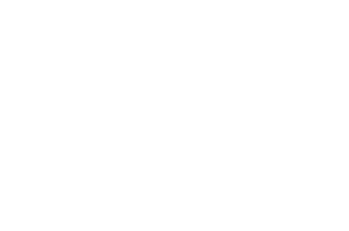

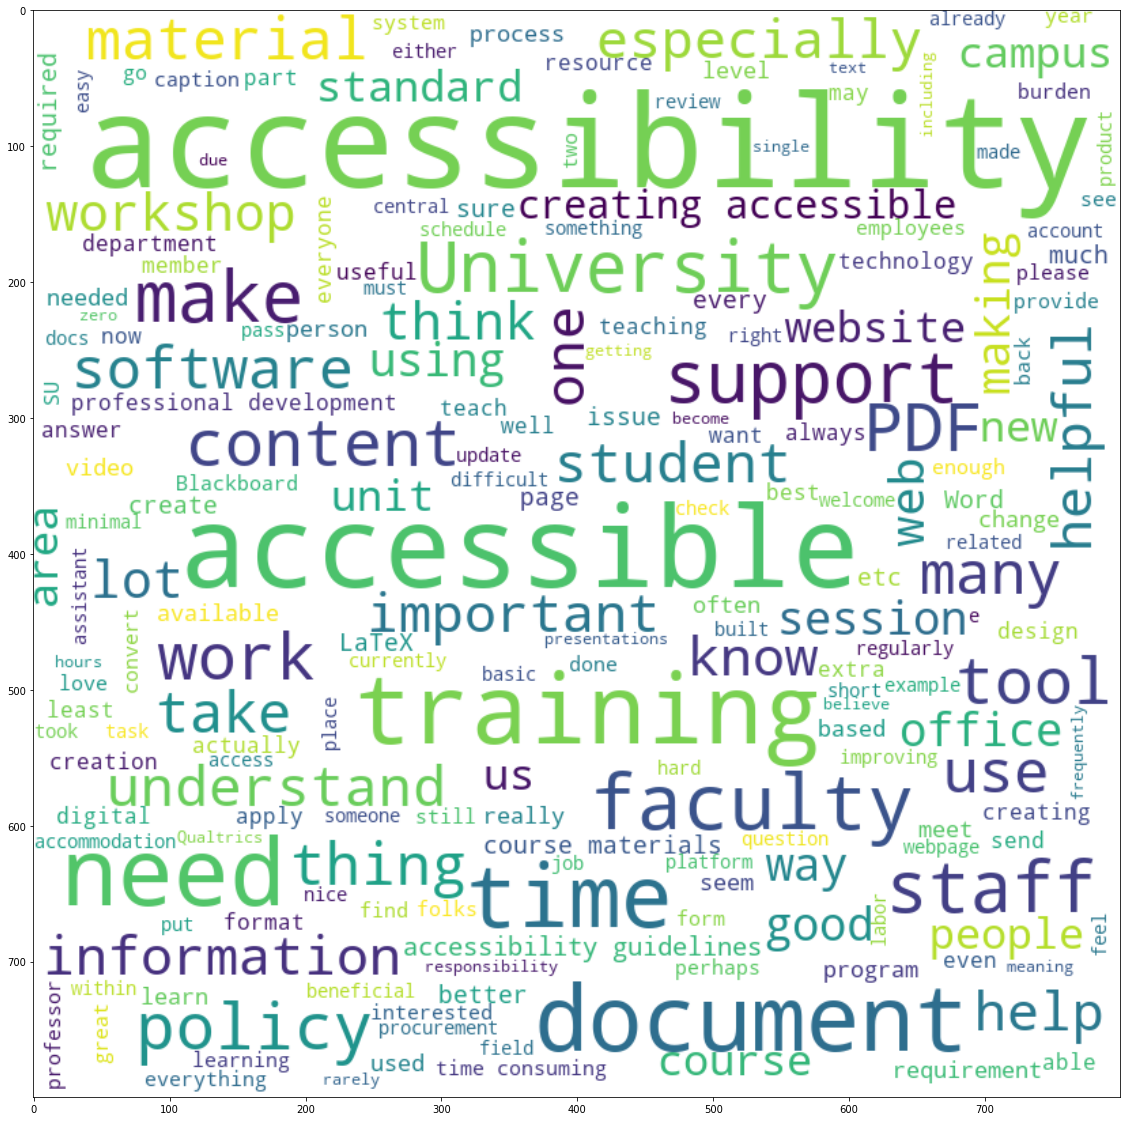

In [ ]:
# create wordcloud for assistive technology usages
# import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
text = " ".join(i for i in accessDf[~accessDf['accessibility.feedback2'].isna()]['accessibility.feedback2'].str.split(',').explode('accessibility.feedback2'))
# assistiveTechCounts.to_dict
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 5, stopwords = stopwords).generate(text)
# wordcloud = WordCloud(collocations = False, background_color = 'white').generate_from_frequencies(dict(assistiveTechCounts))

plt.axis("off")
plt.figure(figsize = (20, 20))
plt.tight_layout(pad = 0)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

### KMeans

In [ ]:
docs = accessDf[~accessDf['accessibility.feedback2'].isna()]['accessibility.feedback2'].reset_index()
corpus = accessDf[~accessDf['accessibility.feedback2'].isna()]['accessibility.feedback2'].reset_index()
docs = docs[['accessibility.feedback2']]
corpus = corpus[['accessibility.feedback2']]

# if necessary, sample down the data
# docs = data.sample(n = 1000, random_state=0)['sentence'].tolist()
print(len(docs))

154


In [ ]:
corpus

accessibility.feedback2
0    More training needs to be provided. It is not ...
1    The policy is difficult when dealing with scie...
2                                                     
3                    Yearly training would be helpful.
4    I don’t believe SU has any demonstrated compet...
..                                                 ...
149  Just to be able to understand the content to b...
150                                               NONE
151  The time to get software reviewed and approved...
152     I have taken development sessions previously. 
153  If there were more than 24 hours in a day - I ...

[154 rows x 1 columns]

In [ ]:
corpus = corpus[corpus['accessibility.feedback2'] != '  ']

In [ ]:
corpus = corpus.reset_index()

In [ ]:
corpus = corpus['accessibility.feedback2']

In [ ]:
corpus

0      More training needs to be provided. It is not ...
1      The policy is difficult when dealing with scie...
2                      Yearly training would be helpful.
3      I don’t believe SU has any demonstrated compet...
4                                      Way too overhyped
                             ...                        
148    Just to be able to understand the content to b...
149                                                 NONE
150    The time to get software reviewed and approved...
151       I have taken development sessions previously. 
152    If there were more than 24 hours in a day - I ...
Name: accessibility.feedback2, Length: 153, dtype: object

In [ ]:
# tfidf representation

from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words = 'english')
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

394


In [ ]:
from sklearn.cluster import KMeans

K = 3
tfidf_model = KMeans(n_clusters = K, random_state = 2022)
tfidf_model.fit(tfidf)
labels = tfidf_model.labels_.tolist() 

In [ ]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0) + 1
  print(cnt_perCluster)

In [ ]:
print_cluster_sizes(tfidf_model)

{0: 71, 2: 45, 1: 37}


In [ ]:
# print documents closest to each centroid
# sometimes we see a doc from another cluster j ends up in the list of the closest to centroid i
# this can happen when two clusters share some characteristics, 
# e.g. cluster i is about hanging out with friend, cluster j is about entertainment, a doc about going to movie with friends may be close to both centroids

import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j] # transform all docs to cluster-distance space
    idx = np.argsort(d)[:n] # find n docs closest to centroid

    c_idx = [m for m, label in enumerate(model.labels_) if label==j]  # find the index of all docs in cluster j   
    print('\n\n======cluster #', j, ', cluster size:', len(c_idx))
    for i in idx:
      if i not in c_idx:
        print('[ this doc is in a different cluster #', model.labels_[i], '>>', corpus[i])
      else:
        print(corpus[i])
  return

In [ ]:
print_docs_closest_to_centroids(tfidf_model, tfidf, 5)



======cluster # 0 , cluster size: 71
N
No comment
none
NONE
none


======cluster # 1 , cluster size: 37
[ this doc is in a different cluster # 0 >> N
[ this doc is in a different cluster # 0 >> NONE
[ this doc is in a different cluster # 0 >> none
[ this doc is in a different cluster # 0 >> No comment
[ this doc is in a different cluster # 0 >> none


======cluster # 2 , cluster size: 45
[ this doc is in a different cluster # 0 >> none
[ this doc is in a different cluster # 0 >> N
[ this doc is in a different cluster # 0 >> No comment
[ this doc is in a different cluster # 0 >> none
[ this doc is in a different cluster # 0 >> NONE


In [ ]:
# Plot the inertia graph
import matplotlib.pyplot as plt
def plot_inertia(inertia_list):
  plt.plot(range(1,len(inertia_list) + 1), inertia_list, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()

In [ ]:
# use the Elbow method to determine the best k
# sometimes it does not work
def elbow(m, corpus):
  inertia_lst = []
  for i in range(1, m + 1):
    model = KMeans(n_clusters = i)
    model.fit(corpus)
    
    inertia = model.inertia_
    inertia_lst.append(inertia)
  plot_inertia(inertia_lst)

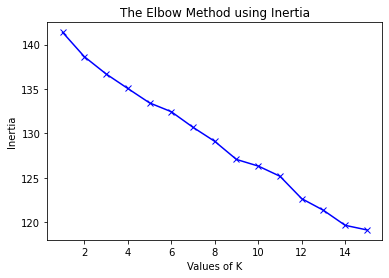

In [ ]:
elbow(15, tfidf)

In [ ]:
# compared to SBERT

In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.3 MB/s 
     |████████████████████████████████| 5.8 MB 56.5 MB/s 
     |████████████████████████████████| 1.3 MB 59.9 MB/s 
     |████████████████████████████████| 182 kB 72.2 MB/s 
     |████████████████████████████████| 7.6 MB 38.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=4e59771c4bb1bd61e4e3e89a9d6c347e1b61ee672620375e90d37110af75b00d
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
sbert_embeddings = embedder.encode(corpus)

In [ ]:
K = 2  # change number of cluster if applicable
sbert_model = KMeans(n_clusters = K, random_state = 2022)
sbert_model.fit(sbert_embeddings)
labels = sbert_model.labels_.tolist()  # Save cluster labels in a separate list

In [ ]:
print_cluster_sizes(sbert_model)

{0: 76, 1: 77}


In [ ]:
print_docs_closest_to_centroids(sbert_model, sbert_embeddings, 10)



======cluster # 0 , cluster size: 76
I take seriously making documents accessible. Using posted resources is much more efficient than training sessions.
There should be more staff training and support for this work; too much of this is put on faculty currently.
More training needs to be provided. It is not easy to do!
There needs to be much more training and teaching around making and creating accessible documents and videos. Additionally we need more material support like offices which can help us make this happen.
[ this doc is in a different cluster # 1 >> Workload is a barrier to effectively creating accessible content for me. It would be nice if someone in the department took up this responsibility for faculty. 
It is important to offer continuous trainings on accessible technology, as it frequently changes and many staff would benefit from refreshers.
Training provided was very hard to absorb and apply.  I would prefer to see a centralized department who could review objects an

### LDA

In [ ]:
# https://github.com/MaartenGr/BERTopic
# https://stackoverflow.com/questions/73830225/init-got-an-unexpected-keyword-argument-cachedir-when-importing-top2vec
# https://arxiv.org/pdf/2203.05794.pdf

#!pip install bertopic[flair, gensim, spacy, use]

!pip install bertopic
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 4.4 MB/s 
     |████████████████████████████████| 88 kB 7.8 MB/s 
     |████████████████████████████████| 662 kB 57.4 MB/s 
     |████████████████████████████████| 5.2 MB 46.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1 MB 50.0 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700829 sha256=343a442d63dd029acf8784ee043e8bda4d99f71a893291efb75b2e6a028e9c27
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=b6e75f01772d5d562b2b738451f6c4353b5a57ee8608ec537d5cfe753c750826
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 18.1 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
docs = corpus

In [ ]:
#LDA

# removing stopwords usually improve topic models
# stoplist is often customized to include more domain-specific topic words

from sklearn.feature_extraction import text

added_stopwords = frozenset(['just', 'did'])
my_stopwords = text.ENGLISH_STOP_WORDS.union(added_stopwords)
print(len(my_stopwords))
print(my_stopwords)

320
frozenset({'namely', 'moreover', 'the', 'system', 'own', 'name', 'ie', 'done', 'another', 'bill', 'otherwise', 'not', 'it', 'thin', 'hundred', 'whole', 'always', 'were', 'nor', 'least', 'against', 'else', 'we', 'somehow', 'how', 'him', 'myself', 'again', 'everything', 'yours', 'anyone', 'beforehand', 'before', 'via', 'due', 'interest', 'rather', 'what', 'please', 'towards', 'every', 'out', 'first', 'none', 'therein', 'hence', 'upon', 'less', 'without', 'they', 'nowhere', 'never', 'her', 'did', 'six', 'anything', 'until', 'above', 'even', 'its', 'full', 'under', 'nevertheless', 'your', 'once', 'thereupon', 'be', 'seems', 'except', 'us', 'many', 'put', 'over', 'mostly', 'below', 'latter', 'became', 'which', 'others', 'found', 'serious', 'describe', 'when', 'himself', 'hereby', 'fill', 'their', 'other', 'cannot', 'enough', 'already', 'between', 'seem', 'sometime', 'has', 'thereby', 'often', 'will', 'those', 'but', 'get', 'same', 'perhaps', 'meanwhile', 'herself', 'only', 'fire', 'to',

In [ ]:
# tfidf usually help improve topic models

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words = 'english')
tfidf = tfidf_vectorizer.fit_transform(docs)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

394


In [ ]:
# call the LDA algorithm to fit a topic model, and transform all documents to their topic distrinbutions

from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 5

# Run NMF
# nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components = no_topics, max_iter = 10, learning_method = 'online', learning_offset = 50., random_state = 2022)
lda_z = lda.fit_transform(tfidf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10

In [ ]:
# now examine each topic cluster to see if it makes sense
# try to label each topic cluster with a word or phrase
# it happens quite often that some topic clusters don't make sense
# when that happens, adjust the number of topics to see if better models can be created
# you can also adjust the stoplist to see if adding more stopwords leads to clearer topics

display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0:
helpful academic idea training development sessions previously taken thank link
Topic 1:
time accessible need process pdfs software projects difficult reviewed really
Topic 2:
accessibility able day read information just people hours needed nice
Topic 3:
accessibility use accessible time tools support faculty help learning necessary
Topic 4:
training helpful accessibility docs topic using link guidelines single feedback


In [ ]:
# now examine the topic distribution in each document
# since each document is considered a mixture of all topics with different probabilities

# lda_z stores the prob distribution for each document
# for the 20newsgroup dataset, it is a 11314*15 matrix
# 11314 documents, 15 topics

# examine document #5 (index starts at 0)
# high prob for topics #6 and #7 (index starts at 0), with probs 0.40 and 0.41
# the document reads as related to religion

print(lda_z.shape)
print(lda_z[5])
print(docs[5])
#print(documents.shape)

(153, 5)
[0.05183437 0.05215291 0.0515763  0.7928208  0.05161563]
Support staff should be available to assist faculty in keeping their course materials accessible.


In [ ]:
import bertopic

In [ ]:
# notes from BERTopic documentation
# We start by instantiating BERTopic. We set language to english since our documents are in the English language. 
# If you would like to use a multi-lingual model, please use language="multilingual" instead.
# Use language="multilingual" to select a model that support 50+ languages.
# 
# We will also calculate the topic probabilities. 
# However, this can slow down BERTopic significantly at large amounts of data (>100_000 documents). 
# It is advised to turn this off if you want to speed up the model.
#
# select sentence transformer models from https://www.sbert.net/docs/pretrained_models.html
# The all-* models where trained on all available training data (more than 1 billion training pairs) and are designed as general purpose models. 
# The all-mpnet-base-v2 model provides the best quality, while all-MiniLM-L6-v2 is 5 times faster and still offers good quality.

from bertopic import BERTopic

topic_model = BERTopic(embedding_model = "all-MiniLM-L12-v2", calculate_probabilities = True, verbose = True)
topics, probs = topic_model.fit_transform(docs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2022-12-03 16:38:53,439 - BERTopic - Transformed documents to Embeddings
2022-12-03 16:39:01,987 - BERTopic - Reduced dimensionality
2022-12-03 16:39:02,009 - BERTopic - Clustered reduced embeddings


In [ ]:
# After generating topics and their probabilities, we can access the frequent topics that were generated
# -1 refers to all outliers and should typically be ignored. 

freq = topic_model.get_topic_info(); 
num_topics = len(freq) - 1
print(num_topics)
freq.head(num_topics)

5


Topic  Count                         Name
0     -1     62             -1_to_and_the_it
1      0     25              0_to_and_is_the
2      1     22  1_accessibility_to_have_and
3      2     21       2_be_training_to_would
4      3     12           3_the_policy_is_of

In [ ]:
for i in range(num_topics):
  print("\n== Representative documents in cluster #", i)
  print(topic_model.get_representative_docs(i))


== Representative documents in cluster # 0
['Microsoft Word and Adobe Acrobat are rarely used for document creation in many fields. LaTeX is the primary way to author documents. Currently, there *is* a need for greater LaTeX compatibility with screen readers.\n\nf the university wants to facilitate greater accessibility, the best thing they could do would be to take some of the money used on snake oil and use it to sponsor one of the efforts to create a usable accessibility package for LaTeX. This would both help SU and everyone else around the world.', "I frequently update PDF forms (with many text fields) for student use and sometimes wonder if there are short cuts that I'm not aware of.", "Training in this area should be required and part of on-boarding for new employees - especially faculty. Admin office staff should have yearly training on creating accessible pdf's and word, and excel documents.  And discouraged from using powerpoint.  "]

== Representative documents in cluster #

In [ ]:
topic_model.find_topics("work")

([2, 4, 3, 0, 1],
 [0.54491862945832,
  0.47105133358044793,
  0.42884422059698757,
  0.42643725921838455,
  0.4258365607179297])

In [ ]:
topic_model.get_topic(0)  # Select the most frequent topic

[('to', 0.06571238512351783),
 ('and', 0.06006124101460522),
 ('is', 0.0498422897949238),
 ('the', 0.047221521413121276),
 ('that', 0.0466808692230705),
 ('of', 0.04060150629901358),
 ('for', 0.03615749990812088),
 ('this', 0.03514628907650078),
 ('it', 0.03410526529117141),
 ('accessible', 0.03341760506455829)]

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_distribution(probs[150], min_probability = 0.010)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics = 50)

In [ ]:
topic_model.visualize_barchart(top_n_topics = 5)

In [ ]:
topic_model.visualize_heatmap(n_clusters = 4, width = 1000, height = 1000)

### Descriptive Analysis

In [ ]:
accessDf.head()

accessibility.policy.knowlege accessibility.doc.creation.impact  \
0             Somewhat disagree                 Somewhat disagree   
1                      Disagree                               NaN   
2                Somewhat agree                    Strongly agree   
3                Somewhat agree                 Somewhat disagree   
4             Somewhat disagree                 Strongly disagree   

  accessibility.aware.toolkit accessibility.professional.development  \
0                    Disagree                         Somewhat agree   
1                    Disagree                                  Agree   
2           Strongly disagree                      Strongly disagree   
3                       Agree                                  Agree   
4                       Agree                         Strongly agree   

  accessibility.feedback2  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN

In [ ]:
# replace NAs with No Response
accessDf = accessDf.fillna('No Response')

In [ ]:
accessPolicyGroup = accessDf.groupby(['accessibility.policy.knowlege'])['accessibility.policy.knowlege'].count()
accessPolicyGroup = pd.DataFrame(accessPolicyGroup)
accessDocGroup = accessDf.groupby(['accessibility.doc.creation.impact'])['accessibility.doc.creation.impact'].count()
accessDocGroup = pd.DataFrame(accessDocGroup)
accessAwareGroup = accessDf.groupby(['accessibility.aware.toolkit'])['accessibility.aware.toolkit'].count()
accessAwareGroup = pd.DataFrame(accessAwareGroup)
accessPdGroup = accessDf.groupby(['accessibility.professional.development'])['accessibility.professional.development'].count()
accessPdGroup = pd.DataFrame(accessPdGroup)
accessGroup = accessPolicyGroup.merge(accessDocGroup, left_index = True, right_index = True)
accessGroup = accessGroup.merge(accessAwareGroup, left_index = True, right_index = True)
accessGroup = accessGroup.merge(accessPdGroup, left_index = True, right_index = True)
# syrEduGroup.rename(columns = {'ResonceID_x': 'navigationEase', 'ResonceID_y': 'informationOrganization'}, inplace=True)

In [ ]:
accessGroup

accessibility.policy.knowlege  \
accessibility.policy.knowlege                                  
Agree                                                    565   
Disagree                                                 126   
No Response                                              173   
Somewhat agree                                           505   
Somewhat disagree                                        181   
Strongly agree                                           144   
Strongly disagree                                         29   

                               accessibility.doc.creation.impact  \
accessibility.policy.knowlege                                      
Agree                                                        453   
Disagree                                                     173   
No Response                                                  401   
Somewhat agree                                               311   
Somewhat disagree                                            223   
Strongly agree                                                77   
Strongly disagree                                             85   

                               accessibility.aware.toolkit  \
accessibility.policy.knowlege                                
Agree                                                  352   
Disagree                                               303   
No Response                                            429   
Somewhat agree                                         305   
Somewhat disagree                                      186   
Strongly agree                                          91   
Strongly disagree                                       57   

                               accessibility.professional.development  
accessibility.policy.knowlege                                          
Agree                                                             385  
Disagree                                                          163  
No Response                                                       501  
Somewhat agree                                                    338  
Somewhat disagree                                                 129  
Strongly agree                                                    158  
Strongly disagree                                                  49

Text(0.5, 1.0, 'Knowledgability of accessibility policy, Impact of accessibility while creating documents,\nFamiliarity with Accessibility toolkit, Interest in professional development for accessibility')

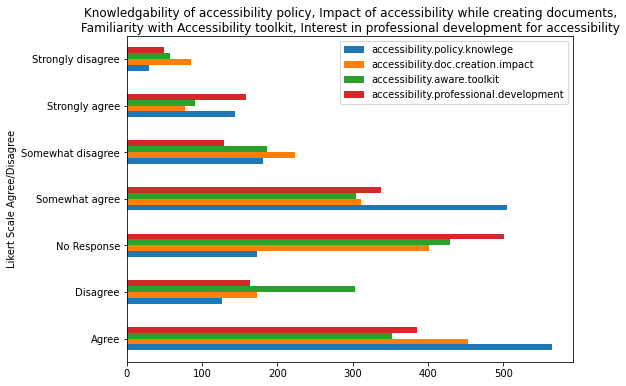

In [ ]:
accessGroup.plot(kind = 'barh', xlabel = 'Likert Scale Agree/Disagree', figsize = (8,6), ylabel = 'Count of records')
plt.xticks(rotation = 0)
plt.title('Knowledgability of accessibility policy, Impact of accessibility while creating documents,\n' + 'Familiarity with Accessibility toolkit, Interest in professional development for accessibility', wrap = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5d06e3760>,
      dtype=object)

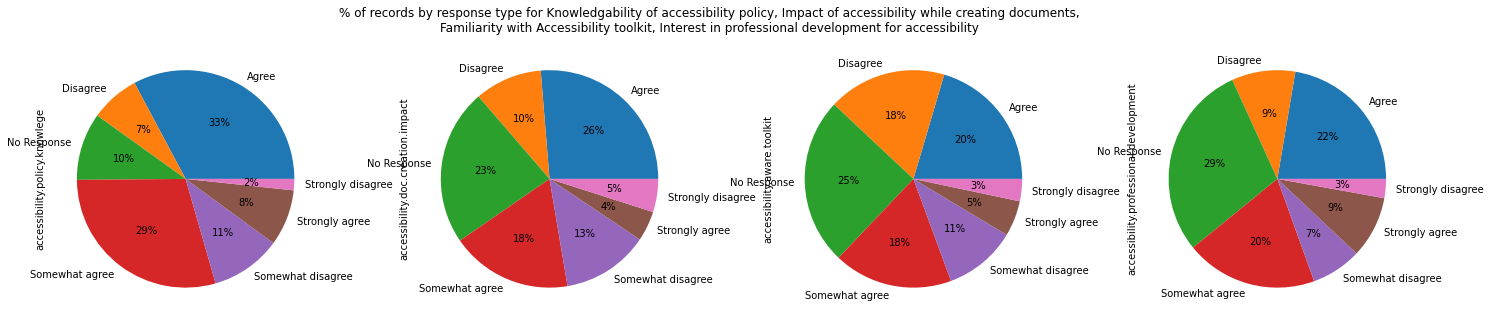

In [ ]:
# create a pie chart
accessGroup.plot(kind = 'pie', title = '% of records by response type for Knowledgability of accessibility policy, Impact of accessibility while creating documents,\n' 
                 + 'Familiarity with Accessibility toolkit, Interest in professional development for accessibility',
                 figsize = (25, 5), autopct = '%1.0f%%', subplots = True, legend = False)
# set_ylabel('')

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 2, 3, 4, constrained_layout = True, sharey = True)
ax1.plot(x, np.cos(6*x) * np.exp(-x))
ax1.set_title('damped')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('amplitude')

ax2.plot(x, np.cos(6*x))
ax2.set_xlabel('time (s)')
ax2.set_title('undamped')

fig.suptitle('Different types of oscillations', fontsize=16)

In [ ]:
import matplotlib.pyplot as plt


## GPT - 2 Clustering

In [ ]:
pip install transformers

In [ ]:
# example from https://towardsdatascience.com/clustering-the-20-newsgroups-dataset-with-gpt3-embeddings-10411a9ad150
import pandas as pd
from transformers import GPT2TokenizerFast
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')
print(list(newsgroups_train.target_names))
print(newsgroups_train.data[:3])
print(newsgroups_train.target[:3])

df_news = pd.DataFrame(list(newsgroups_train.data), columns=['Text'])
df_news["Target"] = list(newsgroups_train.target)

tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

df_news['n_tokens'] = df_news.Text.apply(lambda x: len(tokenizer.encode(x)))
df_news = df_news[df_news.n_tokens<2000]
print(len(df_news))

df_news.head(5)

In [ ]:
from transformers import GPT2LMHeadModel

model = GPT2LMHeadModel.from_pretrained('gpt2')  # or any other checkpoint
word_embeddings = model.transformer.wte.weight  # Word Token Embeddings 
position_embeddings = model.transformer.wpe.weight  # Word Position Embeddings

### Campus Resources

In [ ]:
# docs = df[~df['campus.resources.text'].isna()]
corpus = df[~df['campus.resources.text'].isna()]

In [ ]:
# docs = docs['campus.resources.text']
corpus = corpus['campus.resources.text']

In [ ]:
corpus['campus.resources.text'].to_csv('campusResourcesText.csv')

In [ ]:
corpus = pd.read_csv("/content/campusResourcesText.csv")

In [ ]:
corpus = corpus['campus.resources.text']

In [ ]:
corpus.head()

0                 Help desk; purchase of new equipment
1                        Most resources work just fine
2    Recently, I have good experiences with the LEM...
3    I am on the computer for most of my work day. ...
4    Orange Success is complete garbage!  The only ...
Name: campus.resources.text, dtype: object

In [ ]:
docs = corpus

In [ ]:
# gpt_embeddings = word_embeddings.encode(corpus)

In [ ]:
# pip install openai

In [ ]:
# import openai
# embedder = openai.Engine.embeddings

In [ ]:
# gpt_embeddings = embedder.encode(corpus)

In [ ]:
# https://github.com/openai/openai-cookbook/blob/main/examples/Clustering.ipynb
# from transformers import GPT2TokenizerFast
# tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

In [ ]:
# from https://github.com/openai/openai-cookbook/blob/2072d1a1fd37af326ace6252608dc8cfbacc59d9/examples/Obtain_dataset.ipynb
# from openai.embeddings_utils import get_embedding

# This will take just under 10 minutes
# df['babbage_similarity'] = df.combined.apply(lambda x: get_embedding(x, engine='text-similarity-babbage-001'))
# df['babbage_search'] = df.combined.apply(lambda x: get_embedding(x, engine='text-search-babbage-doc-001'))
# df.to_csv('data/fine_food_reviews_with_embeddings_1k.csv')

In [ ]:
docs.head()

0                 Help desk; purchase of new equipment
1                        Most resources work just fine
2    Recently, I have good experiences with the LEM...
3    I am on the computer for most of my work day. ...
4    Orange Success is complete garbage!  The only ...
Name: campus.resources.text, dtype: object

In [ ]:
crTokens = docs.apply(lambda x: len(tokenizer.encode(x)))
# df_news['n_tokens'] = df_news.Text.apply(lambda x: len(tokenizer.encode(x)))

In [ ]:
crTokens

0       7
1       5
2      19
3      34
4      18
       ..
518    34
519     3
520    13
521    63
522    60
Name: campus.resources.text, Length: 523, dtype: int64

In [ ]:
cr = pd.DataFrame(docs, crTokens)

In [ ]:
cr.head()

campus.resources.text
campus.resources.text                                                   
7                      Yes they do a great job. I would like to see m...
5                      Computers, wifi network, zoom conferencing, em...
19                                                               library
34                     ITS help desk is always available and helpful....
18                     Myslice, hard to find certain things sometime....

In [ ]:
cr = pd.DataFrame(docs)

In [ ]:
cr.head()

campus.resources.text
0               Help desk; purchase of new equipment
1                      Most resources work just fine
2  Recently, I have good experiences with the LEM...
3  I am on the computer for most of my work day. ...
4  Orange Success is complete garbage!  The only ...

In [ ]:
cr = cr.merge(crTokens, left_index = True, right_index = True)

In [ ]:
cr.head()

campus.resources.text_x  campus.resources.text_y
0               Help desk; purchase of new equipment                        7
1                      Most resources work just fine                        5
2  Recently, I have good experiences with the LEM...                       19
3  I am on the computer for most of my work day. ...                       34
4  Orange Success is complete garbage!  The only ...                       18

In [ ]:
cr = cr.reset_index()

In [ ]:
cr.head()

index                            campus.resources.text_x  \
0      0               Help desk; purchase of new equipment   
1      1                      Most resources work just fine   
2      2  Recently, I have good experiences with the LEM...   
3      3  I am on the computer for most of my work day. ...   
4      4  Orange Success is complete garbage!  The only ...   

   campus.resources.text_y  
0                        7  
1                        5  
2                       19  
3                       34  
4                       18

In [ ]:
cr = cr.drop(columns = ['index'])
cr = cr.rename({"campus.resources.text_x" : "campus_resources_text"}, axis = 1)
cr = cr.rename({"campus.resources.text_y" : "campus_resources_token"}, axis = 1)

In [ ]:
cr.head()

campus_resources_text  campus_resources_token
0               Help desk; purchase of new equipment                       7
1                      Most resources work just fine                       5
2  Recently, I have good experiences with the LEM...                      19
3  I am on the computer for most of my work day. ...                      34
4  Orange Success is complete garbage!  The only ...                      18

In [ ]:
# crTokens = crTokens.reset_index()

In [ ]:
# crTokens = crTokens.drop(columns = ['index'])

In [ ]:
crTokens

0       7
1       5
2      19
3      34
4      18
       ..
518    34
519     3
520    13
521    63
522    60
Name: campus.resources.text, Length: 523, dtype: int64

In [ ]:
crVector = model.transformer.wte.weight[crTokens]

In [ ]:
crVector

tensor([[-0.1300, -0.2115,  0.1315,  ..., -0.0846, -0.2080, -0.0746],
        [ 0.0112, -0.1511,  0.1904,  ..., -0.2641,  0.1187, -0.1229],
        [-0.1132, -0.0435,  0.0922,  ..., -0.0442,  0.2205, -0.0069],
        ...,
        [ 0.0466, -0.0113,  0.0283,  ..., -0.0735,  0.0496,  0.0963],
        [-0.0246, -0.3086,  0.0737,  ..., -0.2334, -0.1567,  0.0594],
        [-0.0322, -0.1829,  0.0314,  ..., -0.0933,  0.0799, -0.1122]],
       grad_fn=<IndexBackward0>)

In [ ]:
crVectorDetach = crVector.detach()

In [ ]:
crVectorDetach

tensor([[-0.1300, -0.2115,  0.1315,  ..., -0.0846, -0.2080, -0.0746],
        [ 0.0112, -0.1511,  0.1904,  ..., -0.2641,  0.1187, -0.1229],
        [-0.1132, -0.0435,  0.0922,  ..., -0.0442,  0.2205, -0.0069],
        ...,
        [ 0.0466, -0.0113,  0.0283,  ..., -0.0735,  0.0496,  0.0963],
        [-0.0246, -0.3086,  0.0737,  ..., -0.2334, -0.1567,  0.0594],
        [-0.0322, -0.1829,  0.0314,  ..., -0.0933,  0.0799, -0.1122]])

In [ ]:
from sklearn.cluster import KMeans
K = 5  # change number of cluster if applicable
gpt_model = KMeans(n_clusters = K, random_state = 2022)
gpt_model.fit(crVectorDetach)
labels = gpt_model.labels_.tolist()  # Save cluster labels in a separate list

In [ ]:
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j] # transform all docs to cluster-distance space
    idx = np.argsort(d)[:n] # find n docs closest to centroid

    c_idx = [m for m, label in enumerate(model.labels_) if label==j]  # find the index of all docs in cluster j   
    print('\n\n======cluster #', j, ', cluster size:', len(c_idx))
    for i in idx:
      if i not in c_idx:
        print('[ this doc is in a different cluster #', model.labels_[i], '>>', corpus[i])
      else:
        print(corpus[i])
  return

In [ ]:
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0) + 1
  print(cnt_perCluster)

In [ ]:
print_cluster_sizes(gpt_model)

{3: 88, 4: 29, 2: 175, 1: 151, 0: 80}


In [ ]:
print_docs_closest_to_centroids(gpt_model, crVectorDetach, 10)



======cluster # 0 , cluster size: 80
Wireless network and network connectivity in general.
MySlice, Maxwell's ICT team
VPN and remote desktop; computing resources for research
Overall computing services and resources work well for me
Campus-wide internet access; library site
IT support services. They're terrific. 
Zoom, Blackboard, MySlice
Almost all of MySlice, OnBase
Zoom and Qualtrics work well.
Library Summon; Answers.syr.edu


======cluster # 1 , cluster size: 151
ITS provides excellent online technologies and AV in classrooms. 
For the most part they all work fine for me.
All campus computing resources currently work well for me. 
I guess MySlice works best, then my email
A dedicated team for Hendricks Chapel that we can work with
WiFi, office PC setup, VoIP phone system
Blackboard, google suite, Kaltura, Zoom
Stellar support from SU Libraries Information Technology Services Staff
Connectivity, ITS help desk is OK but overworked
ZOOM is awesome! Google Drive is Awesome!


=====

In [ ]:
crVectorDetach.size()

In [ ]:
cr

### Syracuse.edu

In [ ]:
corpus = df[~df['accessibility.feedback'].isna()]
corpus = corpus['accessibility.feedback']
corpus.to_csv('syracuse_edu.csv')

In [ ]:
corpus.head()

6     Harder to find detailed information then in th...
9     I find syracuse.edu is usually not how I navig...
23    There is no research button on the SU home pag...
25    Why is it so hard to find information on SU we...
42    Search function through the website is not alw...
Name: accessibility.feedback, dtype: object

In [ ]:
corpus = pd.read_csv("/content/syracuse_edu.csv")
corpus = corpus['accessibility.feedback']

In [ ]:
corpus.head()

0    Harder to find detailed information then in th...
1    I find syracuse.edu is usually not how I navig...
2    There is no research button on the SU home pag...
3    Why is it so hard to find information on SU we...
4    Search function through the website is not alw...
Name: accessibility.feedback, dtype: object

In [ ]:
docs = corpus
crTokens = docs.apply(lambda x: len(tokenizer.encode(x)))
# cr = pd.DataFrame(docs, crTokens)
cr = pd.DataFrame(docs)
cr = cr.merge(crTokens, left_index = True, right_index = True)
cr = cr.reset_index()
cr = cr.drop(columns = ['index'])
# cr = cr.rename({"campus.resources.text_x" : "campus_resources_text"}, axis = 1)
# cr = cr.rename({"campus.resources.text_y" : "campus_resources_token"}, axis = 1)

In [ ]:
cr.head()

accessibility.feedback_x  accessibility.feedback_y
0  Harder to find detailed information then in th...                        44
1  I find syracuse.edu is usually not how I navig...                        67
2  There is no research button on the SU home pag...                        23
3  Why is it so hard to find information on SU we...                        29
4  Search function through the website is not alw...                        22

In [ ]:
cr = cr.rename({"accessibility.feedback_x" : "accessibility_feedback"}, axis = 1)
cr = cr.rename({"accessibility.feedback_y" : "accessibility_token"}, axis = 1)

In [ ]:
crVector = model.transformer.wte.weight[crTokens]
crVectorDetach = crVector.detach()

In [ ]:
from sklearn.cluster import KMeans
K = 6  # change number of cluster if applicable
gpt_model = KMeans(n_clusters = K, random_state = 2022)
gpt_model.fit(crVectorDetach)
labels = gpt_model.labels_.tolist()  # Save cluster labels in a separate list

In [ ]:
print_cluster_sizes(gpt_model)

{1: 115, 5: 64, 4: 22, 3: 10, 2: 96, 0: 19}


In [ ]:
print_docs_closest_to_centroids(gpt_model, crVectorDetach, 10)



======cluster # 0 , cluster size: 19
I feel like the site is missing an easily accessible listing (with links) of all departments/divisions/areas of the University.
Different colleges are organized differently, some colleges/departments rely heavily on Answers pages and some don't which can make finding forms/information difficult
especially for my unit, we have poor organization of our information. it does not adequately inform campus community of our services in an organized way.
I would like to see more focus on a faculty portal. Football games and admissions are not relative to me. There is much information overload.
It's really really hard to find forms. Sometimes I'm directed to an administrative form, and I have no idea where it would be.
I find it somewhat confusing when seeking out departments, etc. I’m not already familiar with. Not really a technical issue per se
Organization is not particularly intuitive and the search feature is crap. It brings up results form several ye

### Accessibility

In [ ]:
corpus = df[~df['accessibility.feedback2'].isna()]
corpus = corpus['accessibility.feedback2']
corpus.to_csv('accessibility.csv')

In [ ]:
corpus.head()

6     More training needs to be provided. It is not ...
41    The policy is difficult when dealing with scie...
57                                                     
59                    Yearly training would be helpful.
61    I don’t believe SU has any demonstrated compet...
Name: accessibility.feedback2, dtype: object

In [ ]:
corpus = pd.read_csv("/content/accessibility.csv")
corpus = corpus['accessibility.feedback2']

In [ ]:
corpus.head()

0    More training needs to be provided. It is not ...
1    The policy is difficult when dealing with scie...
2                                                     
3                    Yearly training would be helpful.
4    I don’t believe SU has any demonstrated compet...
Name: accessibility.feedback2, dtype: object

In [ ]:
docs = corpus
crTokens = docs.apply(lambda x: len(tokenizer.encode(x)))
# cr = pd.DataFrame(docs, crTokens)
cr = pd.DataFrame(docs)
cr = cr.merge(crTokens, left_index = True, right_index = True)
cr = cr.reset_index()
cr = cr.drop(columns = ['index'])
# cr = cr.rename({"campus.resources.text_x" : "campus_resources_text"}, axis = 1)
# cr = cr.rename({"campus.resources.text_y" : "campus_resources_token"}, axis = 1)

In [ ]:
cr.head()

accessibility.feedback2_x  \
0  More training needs to be provided. It is not ...   
1  The policy is difficult when dealing with scie...   
2                                                      
3                  Yearly training would be helpful.   
4  I don’t believe SU has any demonstrated compet...   

   accessibility.feedback2_y  
0                         14  
1                         38  
2                          2  
3                          7  
4                         15

In [ ]:
cr = cr.rename({"accessibility.feedback2_x" : "accessibility_feedback"}, axis = 1)
cr = cr.rename({"accessibility.feedback2_y" : "accessibility_token"}, axis = 1)

In [ ]:
crVector = model.transformer.wte.weight[crTokens]
crVectorDetach = crVector.detach()

In [ ]:
from sklearn.cluster import KMeans
K = 2  # change number of cluster if applicable
gpt_model = KMeans(n_clusters = K, random_state = 2022)
gpt_model.fit(crVectorDetach)
labels = gpt_model.labels_.tolist()  # Save cluster labels in a separate list

In [ ]:
print_cluster_sizes(gpt_model)

{0: 60, 1: 94}


In [ ]:
print_docs_closest_to_centroids(gpt_model, crVectorDetach, 10)



======cluster # 0 , cluster size: 60
The process related to procurement often gets in the way of work.
We have difficulty getting our students proper document access on military related forms
There's already too much extra stuff we are required to do.
It takes a resources to make all communication accessible. 
optional please, I can't keep doing unpaid training 
Accessibility training for all employees would be extremely beneficial. 
I didn't know about the section. Would possibly be interested
Accessibility Review Committee hampers innovation at the University 
How is the Syracuse University Library website passing accessibility guidelines AT ALL
I have participated in several accessibility trainings offered so far.


======cluster # 1 , cluster size: 94
I have not created content or webpages, and I don't know how to do it.
It would be nice if we could send the document to a department or person to make them accessible
I am interested but do not see what part of my schedule can be e

### IT Challenges

In [ ]:
itDf = df[['it.challenges.text.1']]
itDf = itDf[~itDf['it.challenges.text.1'].isna()].reset_index()
itDf = itDf[['it.challenges.text.1']]
itDf.rename(columns = {'it.challenges.text.1':'itChallenges'}, inplace = True)
print(itDf.shape)
# itDf = itDf.append(df[['it.challenges.text.2']])

(619, 1)


In [ ]:
itDf2 = df[['it.challenges.text.2']]
itDf2 = itDf2[~itDf2['it.challenges.text.2'].isna()].reset_index()
itDf2 = itDf2[['it.challenges.text.2']]
itDf2.rename(columns = {'it.challenges.text.2':'itChallenges'}, inplace = True)
print(itDf2.shape)
itDf3 = df[['it.challenges.text.3']]
itDf3 = itDf3[~itDf3['it.challenges.text.3'].isna()].reset_index()
itDf3 = itDf3[['it.challenges.text.3']]
itDf3.rename(columns = {'it.challenges.text.3':'itChallenges'}, inplace = True)
print(itDf3.shape)

(314, 1)
(152, 1)


In [ ]:
itDf = itDf.append(itDf2, ignore_index = True)

In [ ]:
itDf = itDf.append(itDf3, ignore_index = True)

In [ ]:
itDf.head()

itChallenges
0  We need an approved project management softwar...
1  Outdated technology like laptops and cell phon...
2                                   aging of laptops
3  It has always been a challenge to install larg...
4  This complaint is on behalf of the students I ...

In [ ]:
itDf.to_csv('it.csv')

In [ ]:
corpus = pd.read_csv("/content/it.csv")
corpus = corpus['itChallenges']

In [ ]:
docs = corpus
crTokens = docs.apply(lambda x: len(tokenizer.encode(x)))
# cr = pd.DataFrame(docs, crTokens)
cr = pd.DataFrame(docs)
cr = cr.merge(crTokens, left_index = True, right_index = True)
cr = cr.reset_index()
cr = cr.drop(columns = ['index'])
# cr = cr.rename({"campus.resources.text_x" : "campus_resources_text"}, axis = 1)
# cr = cr.rename({"campus.resources.text_y" : "campus_resources_token"}, axis = 1)

In [ ]:
cr.head()

itChallenges_x  itChallenges_y
0  We need an approved project management softwar...              10
1  Outdated technology like laptops and cell phon...              16
2                                   aging of laptops               3
3  It has always been a challenge to install larg...              58
4  This complaint is on behalf of the students I ...              51

In [ ]:
cr = cr.rename({"itChallenges_x" : "itChallenges"}, axis = 1)
cr = cr.rename({"itChallenges_y" : "itChallengesToken"}, axis = 1)

In [ ]:
crVector = model.transformer.wte.weight[crTokens]
crVectorDetach = crVector.detach()

In [ ]:
from sklearn.cluster import KMeans
K = 6  # change number of cluster if applicable
gpt_model = KMeans(n_clusters = K, random_state = 2022)
gpt_model.fit(crVectorDetach)
labels = gpt_model.labels_.tolist()  # Save cluster labels in a separate list

In [ ]:
print_cluster_sizes(gpt_model)

{0: 233, 1: 221, 5: 305, 2: 201, 3: 54, 4: 71}


In [ ]:
print_docs_closest_to_centroids(gpt_model, crVectorDetach, 10)



======cluster # 0 , cluster size: 233
My office. Can't call.
Security versus functionality and usability. 
Better communication of large scale changes.
Log in issuee and MFA
making documents more accessible on blackboard
Classroom cameras tend to not work
Wireless network drops out occasionally.
Make MySlice more user friendly
Accessing Blackboard past courses.
laptop size - offer larger availability


======cluster # 1 , cluster size: 221
Having the correct settings in Zoom to record presentations. Knowing where the accessibility settings are in Zoom.
my office laptop isn't functional and I've been using a loaner for about a month.
Accessibility demands sometimes are taken to an extreme that makes purchasing new software or services almost impossible.
Would like to have a go-to staff expert for creating qualtrics surveys in our building
Accessing campus resources remotely without a VPN.  RDS is somewhat unreliable and clunky.
I have an aging laptop that needs frequent service, respo